In [142]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2,get_R_sim_pert
from Simul import dZ2_dt,RK4,to_complex,dZ_dt,get_R_simul_wfT,RK4_ZZ
from parfor import parfor

from tqdm.notebook import tqdm
from parfor import parfor

In [181]:
alpha = np.pi/4
beta = 0.5
eta1 = 0.1
eta2 = 0.01
shift = 0
N = 1000

In [182]:
t_end = 2000
Q_init = 0.6
# R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_2,R2_2,Q1_2,Q2_2,_ = get_RQ_MOA2(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

In [173]:
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,seed=None)

In [183]:
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_sim_pert(Q_init,N,eps=eta2,pertb='r',alpha=alpha,beta=beta,eta1=eta1,shift=shift,t_end=t_end,seed=None)

In [254]:
t_end = 0.1
num = 0
while True:
    R1_s,R2_s,Q1_s,Q2_s,t,thetas = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,seed=num)
    print(R2_s[0])
    if 0.01<R2_s[0]<0.02:
        break
    num +=1


0.022656165
0.035810106
0.058422767
0.013866823


In [179]:
t_end = 2000
R1_s,R2_s,Q1_s,Q2_s,t,thetas = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,seed=num)

NameError: name 'num' is not defined

In [196]:
fc = np.fft.rfft(thetas[:,N:],axis=1)
fc_reg = np.fft.rfft(thetas_reg[:,N:],axis=1)
# thetas[:,N:].shape

In [166]:
T1s = thetas_reg[:,N:]
# T1r = thetas[:,N:]

In [175]:
a1_s = np.array([np.mean(np.exp((2*n-1)*1j*T1s),axis=1) for n in range(1,10)])
b1_s = np.array([np.mean(np.exp((2*n)*1j*T1s),axis=1) for n in range(1,10)])
# a1s_s = np.array([np.mean(np.exp(-(2*n-1)*1j*T1s),axis=1) for n in range(1,10)])
# b1s_s = np.array([np.mean(np.exp(-(2*n)*1j*T1s),axis=1) for n in range(1,10)])

In [259]:
a1_r = np.array([np.mean(np.exp((2*n-1)*1j*T1r),axis=1) for n in range(1,10)])
b1_r = np.array([np.mean(np.exp((2*n)*1j*T1r),axis=1) for n in range(1,10)])
# a1s_r = np.array([np.mean(np.exp(-(2*n-1)*1j*T1r),axis=1) for n in range(1,10)])
# b1s_r = np.array([np.mean(np.exp(-(2*n)*1j*T1r),axis=1) for n in range(1,10)])

# a1 = np.mean(np.exp(1j*T1s),axis=1)
# a2 = np.mean(np.exp(2j*T1s),axis=1)
# a3 = np.mean(np.exp(3j*T1s),axis=1)
# a4 = np.mean(np.exp(4j*T1s),axis=1)

Text(0, 0.5, '$f_{2n}$')

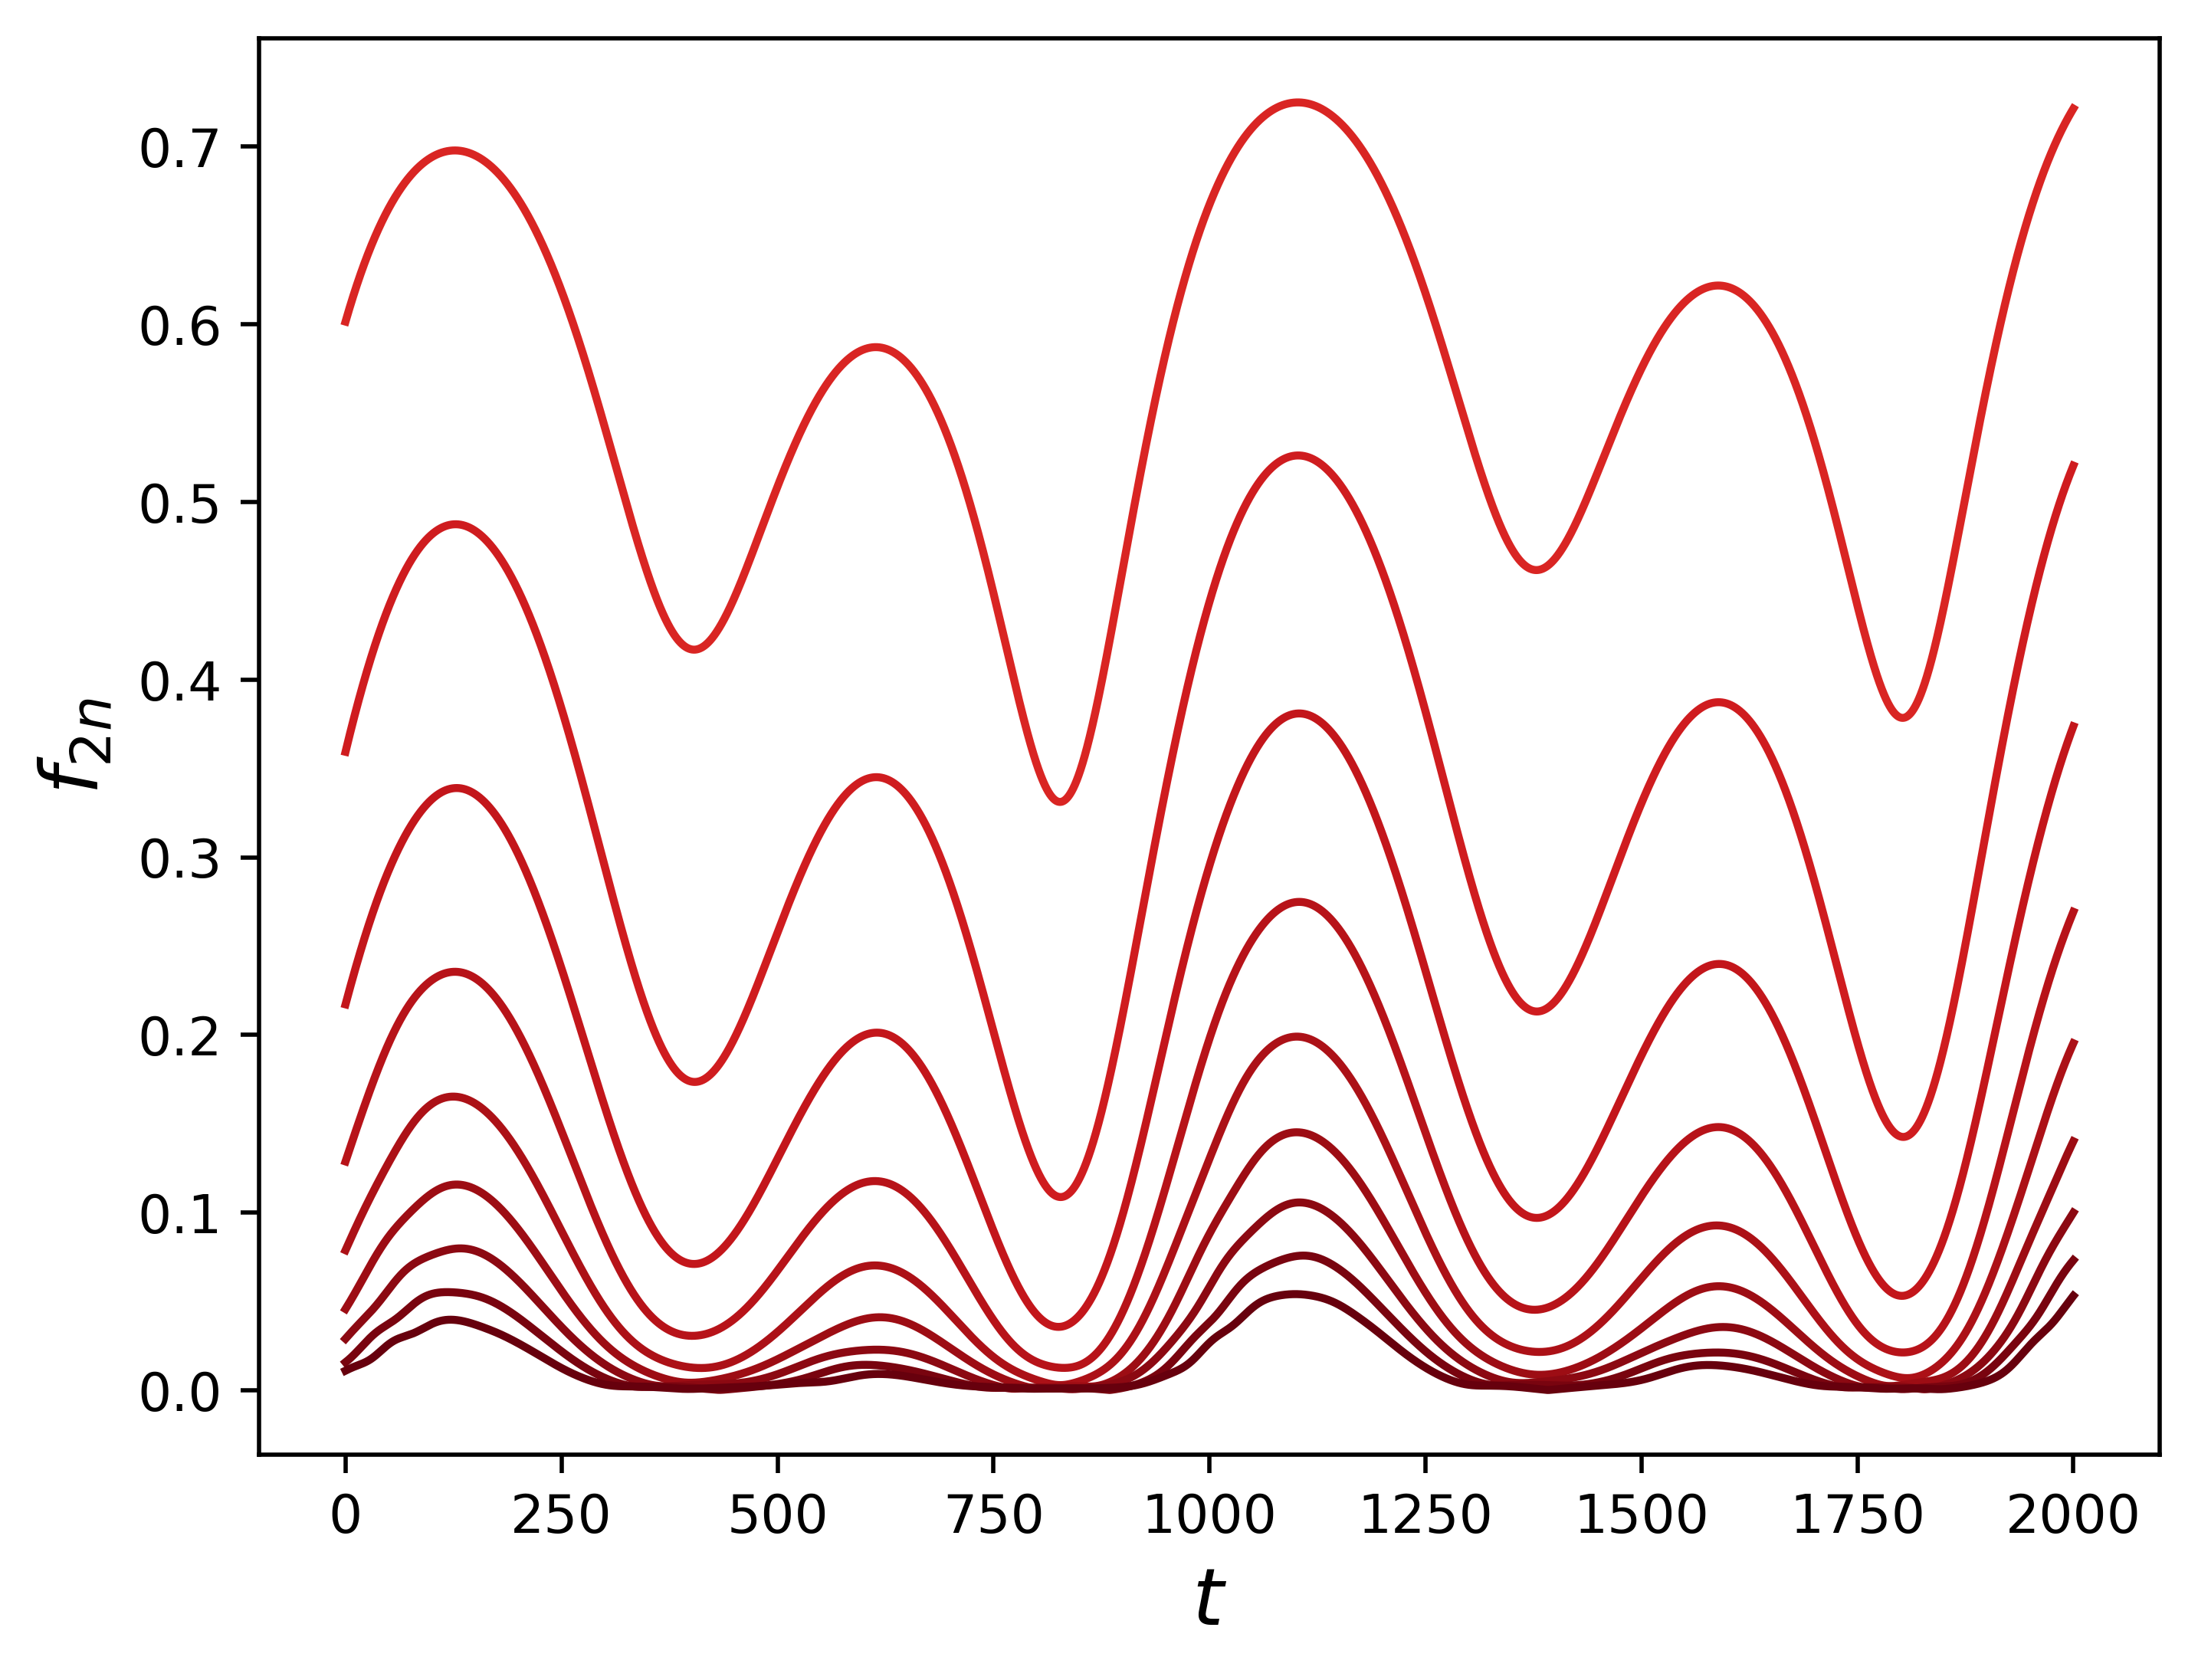

In [184]:
# plt.plot(t,(np.abs(b1_s)).T)
plt.figure(dpi=500)
colors = plt.cm.Reds(np.linspace(0.7, 1, 9))
ln = plt.plot(t, (np.abs(b1_s)).T)
for i, l in enumerate(ln):
    l.set_color(colors[i])

plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$f_{2n}$',fontsize=15)

# plt.plot(t,(np.abs(a1_r)).T)

Text(0, 0.5, '$f_{2n-1}$')

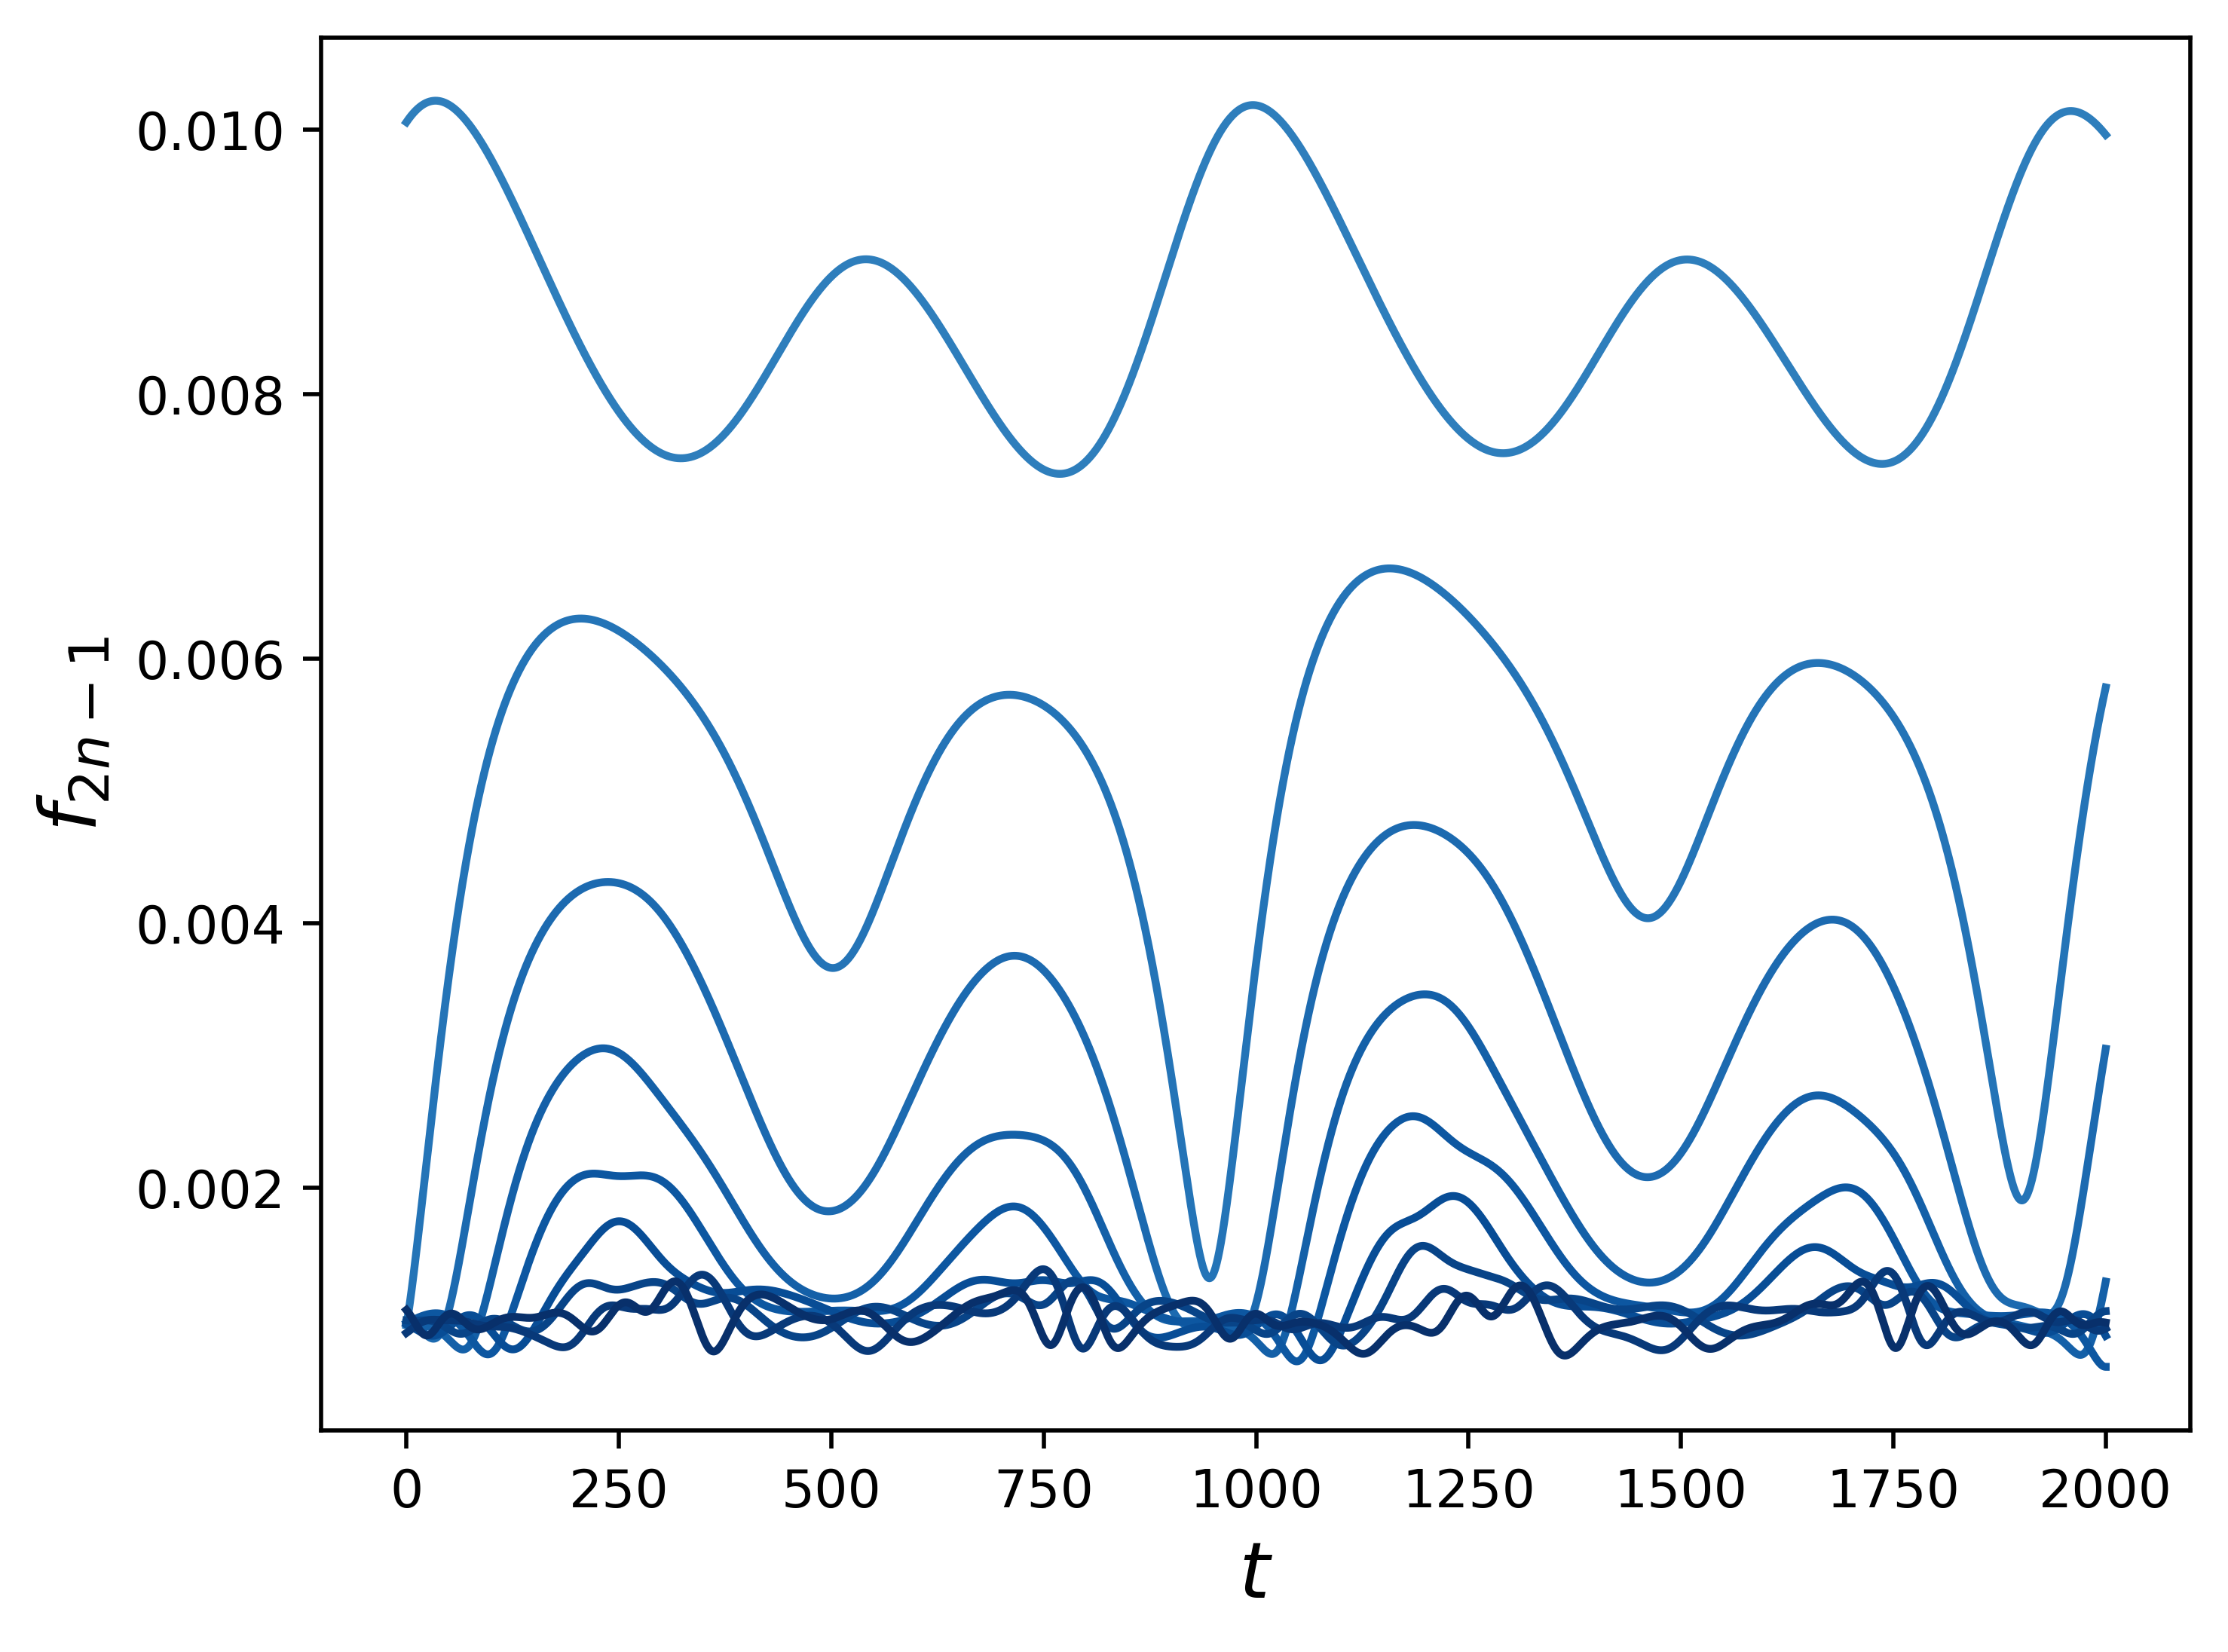

In [185]:
# plt.plot(t,(np.abs(b1_s)).T)
plt.figure(dpi=500)
colors = plt.cm.Blues(np.linspace(0.7, 1, a1_s.shape[0]))
ln = plt.plot(t, (np.abs(a1_s)).T)
for i, l in enumerate(ln):
    l.set_color(colors[i])

plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$f_{2n-1}$',fontsize=15)

# plt.plot(t,(np.abs(a1_r)).T)

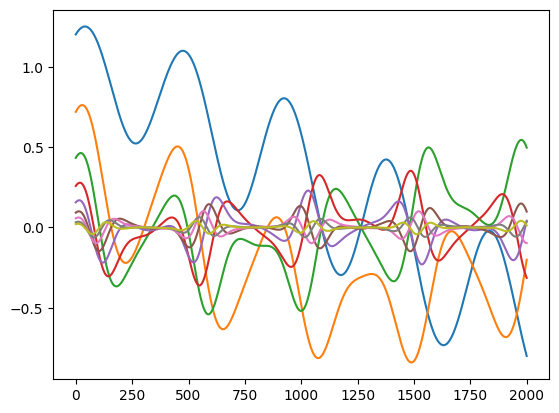

In [140]:
# plt.plot(t,(np.array(a1_s)+np.array(a1s_s)).T)
plt.plot(t,(np.array(b1_s)+np.array(b1s_s)).T)
# plt.plot(t,np.abs(a1s_s).T)
# plt.plot(t,np.abs(b1_s).T)

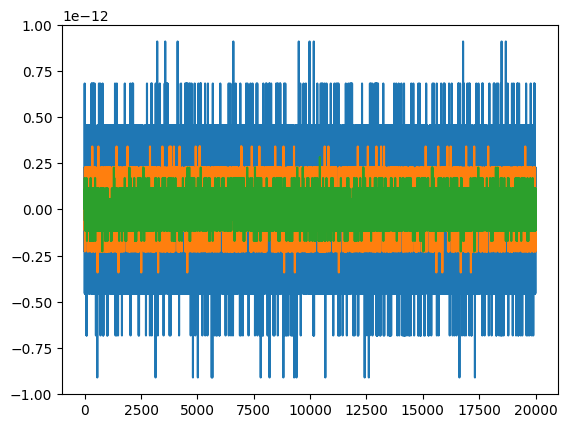

In [52]:
plt.plot(np.abs(fc_reg[:,1])-np.abs(fc_reg[:,-1]))
plt.plot(np.abs(fc_reg[:,3])-np.abs(fc_reg[:,-3]))
plt.plot(np.abs(fc_reg[:,5])-np.abs(fc_reg[:,-5]))

# plt.plot(np.abs(fc[:,1]))
# plt.plot(np.abs(fc[:,3]))
# plt.plot(np.abs(fc_reg[:,3]))
# plt.plot(np.abs(fc_reg[:,5]))


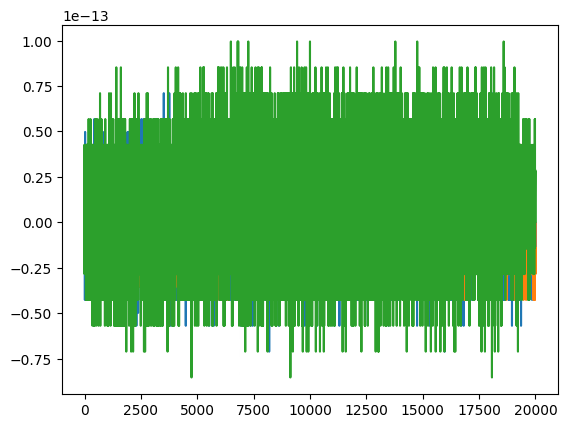

In [53]:
plt.plot(np.abs(fc[:,1])-np.abs(fc[:,-1]))
plt.plot(np.abs(fc[:,3])-np.abs(fc[:,-3]))
plt.plot(np.abs(fc[:,5])-np.abs(fc[:,-5]))

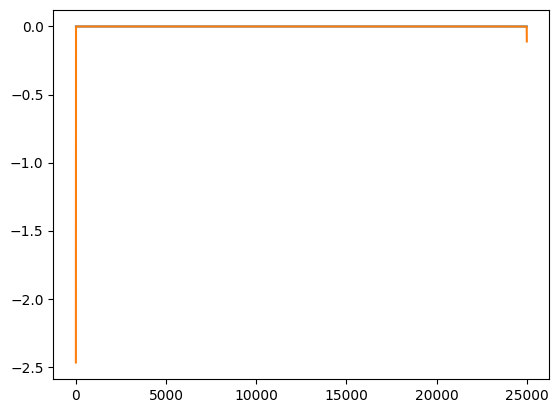

In [ ]:
plt.plot(np.mean(np.diff(np.abs(fc[:,1::2]),axis=0),axis=0))
plt.plot(np.mean(np.diff(np.abs(fc[:,0::2]),axis=0),axis=0))
# plt.plot(np.mean(np.diff(np.abs(fc[:,::2]),axis=0),axis=0))

In [ ]:
np.diff([[1,2,3],[3,4,5]],axis=1)

array([[1, 1],
       [1, 1]])

In [ ]:
fc.shape

(50000, 5000)

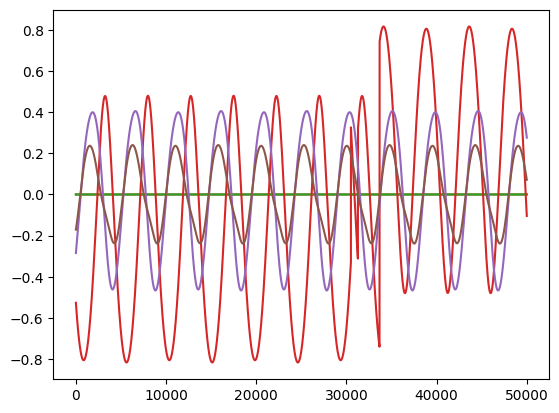

In [ ]:
plt.plot(np.diff(np.abs(fc[:,1])))
plt.plot(np.diff(np.abs(fc[:,3])))
plt.plot(np.diff(np.abs(fc[:,5])))
# plt.plot(np.diff(np.abs(fc[:,1])))
plt.plot(np.diff(np.abs(fc[:,0])))
plt.plot(np.diff(np.abs(fc[:,2])))
plt.plot(np.diff(np.abs(fc[:,4])))

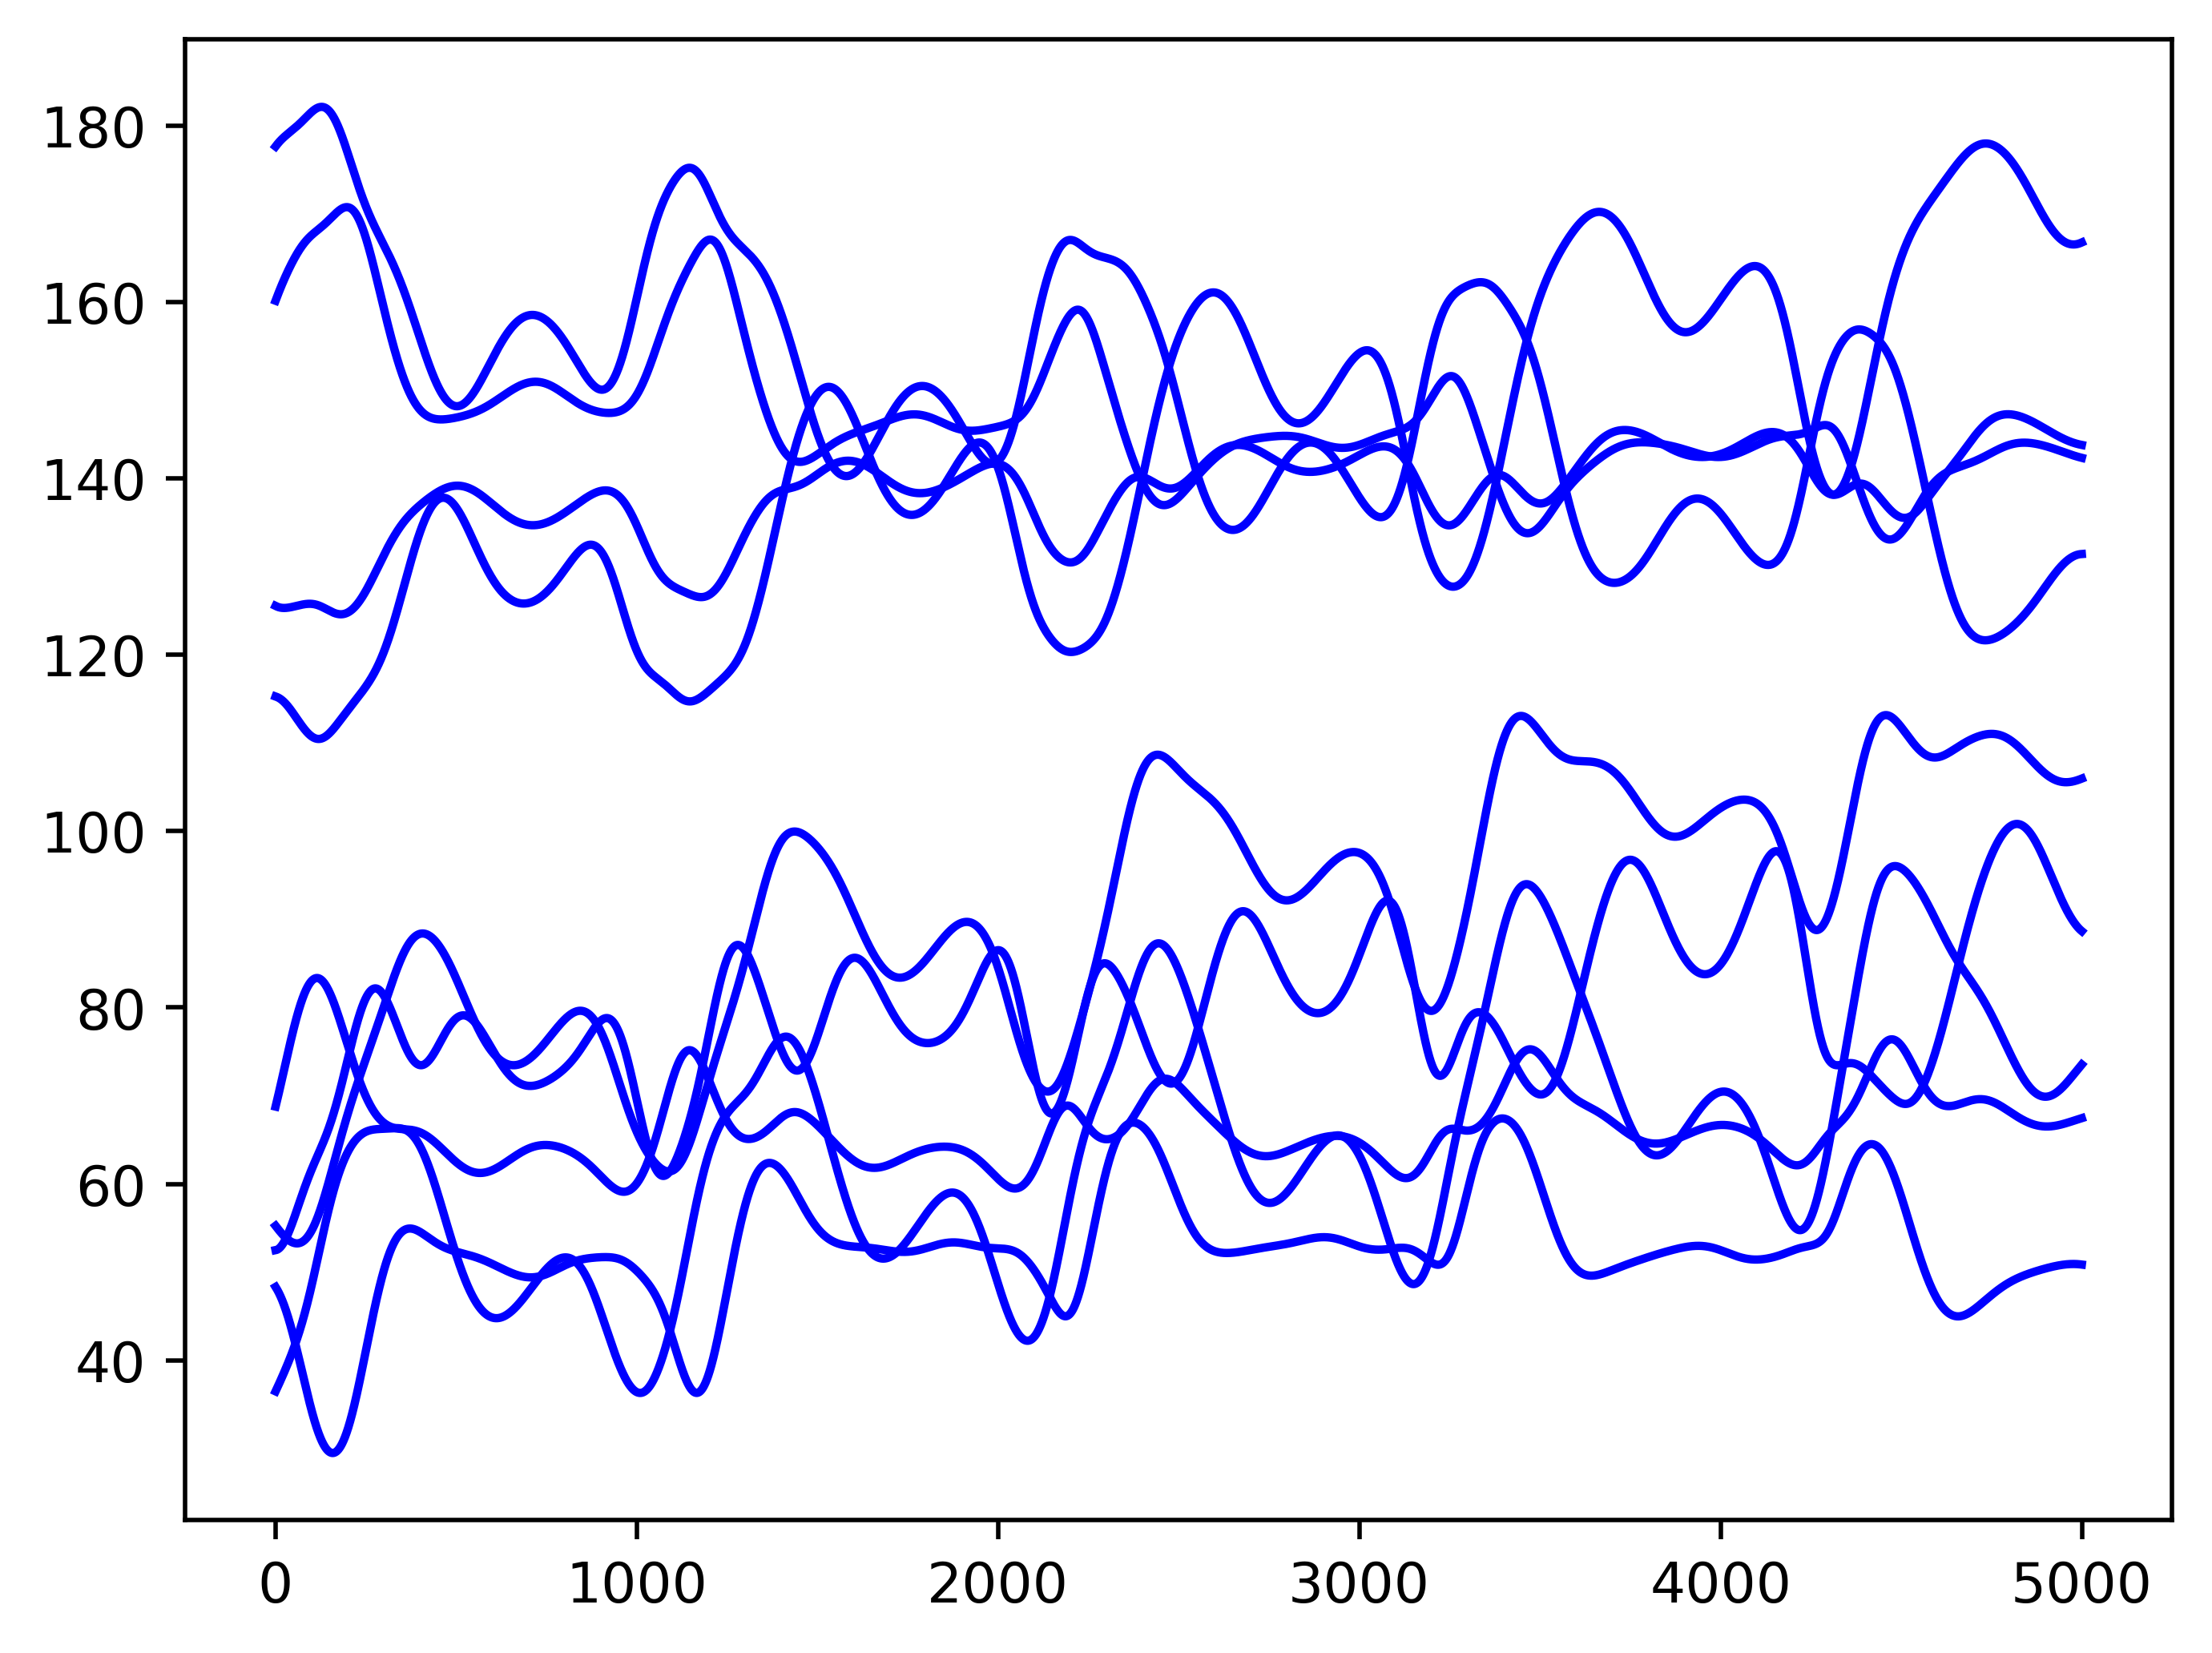

In [ ]:
plt.figure(dpi=500)
# plt.plot(np.abs(fc[:,0]),color='red')
# plt.plot(np.abs(fc[:,2]),color='red')
# plt.plot(np.abs(fc[:,4]),color='red')
# plt.plot(np.abs(fc[:,6]),color='red')
# plt.plot(np.abs(fc[:,8]),color='red')
# plt.plot(np.abs(fc[:,10]),color='red')
# plt.plot(np.abs(fc[:,12]),color='red')

# plt.ylim(0,200)
plt.plot(t,np.abs(fc[:,1]),color='blue')
plt.plot(t,np.abs(fc[:,3]),color='blue')
plt.plot(t,np.abs(fc[:,5]),color='blue')
plt.plot(t,np.abs(fc[:,7]),color='blue')
plt.plot(t,np.abs(fc[:,9]),color='blue')
plt.plot(t,np.abs(fc[:,11]),color='blue')
plt.plot(t,np.abs(fc[:,13]),color='blue')
plt.plot(t,np.abs(fc[:,15]),color='blue')
plt.plot(t,np.abs(fc[:,17]),color='blue')

# plt.plot(np.abs(fc[:,-1]),color='red')
# plt.plot(np.abs(fc[:,-3]),color='red')
# plt.plot(np.abs(fc[:,-5]),color='red')
# plt.plot(np.abs(fc[:,-7]),color='red')
# plt.plot(np.abs(fc[:,-9]),color='red')
# plt.plot(np.abs(fc[:,-11]),color='red')


# plt.ylim(0,1)

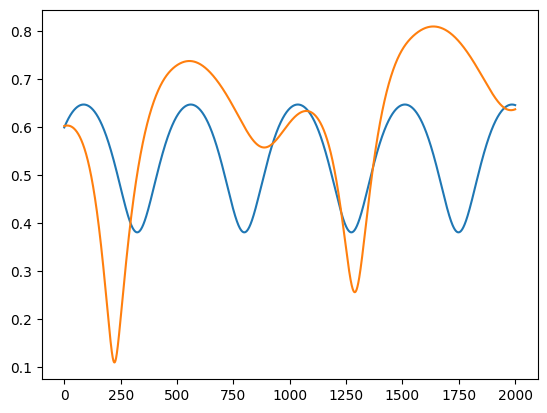

In [117]:
plt.plot(t,Q2_2)
plt.plot(t,Q2_s)
# plt.plot(t,Q2_s_reg)

NameError: name 'Q2_s' is not defined

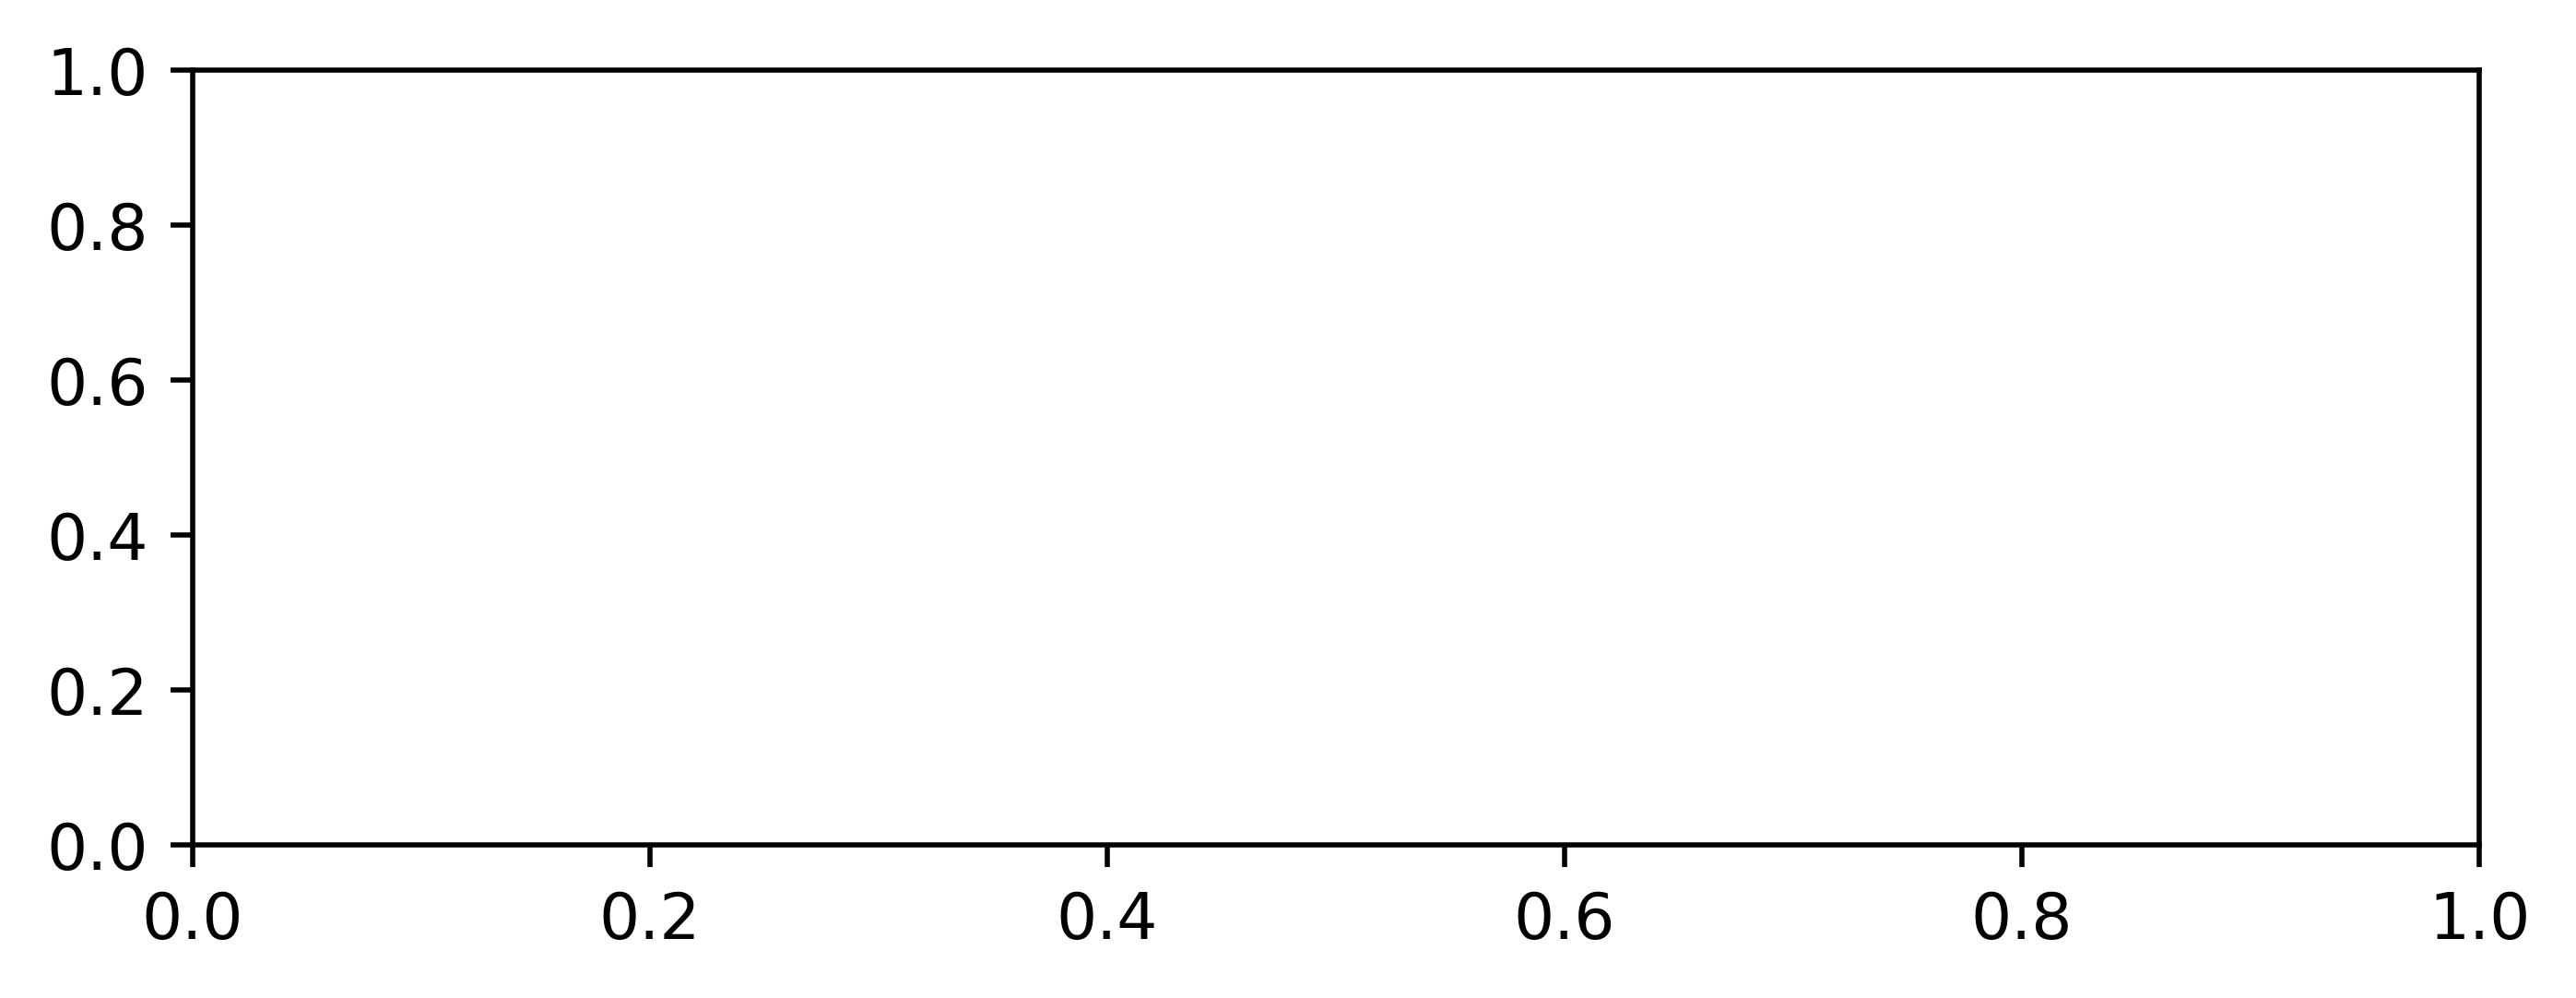

In [178]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
plt.ylim(0.0,1.05)
plt.tight_layout()

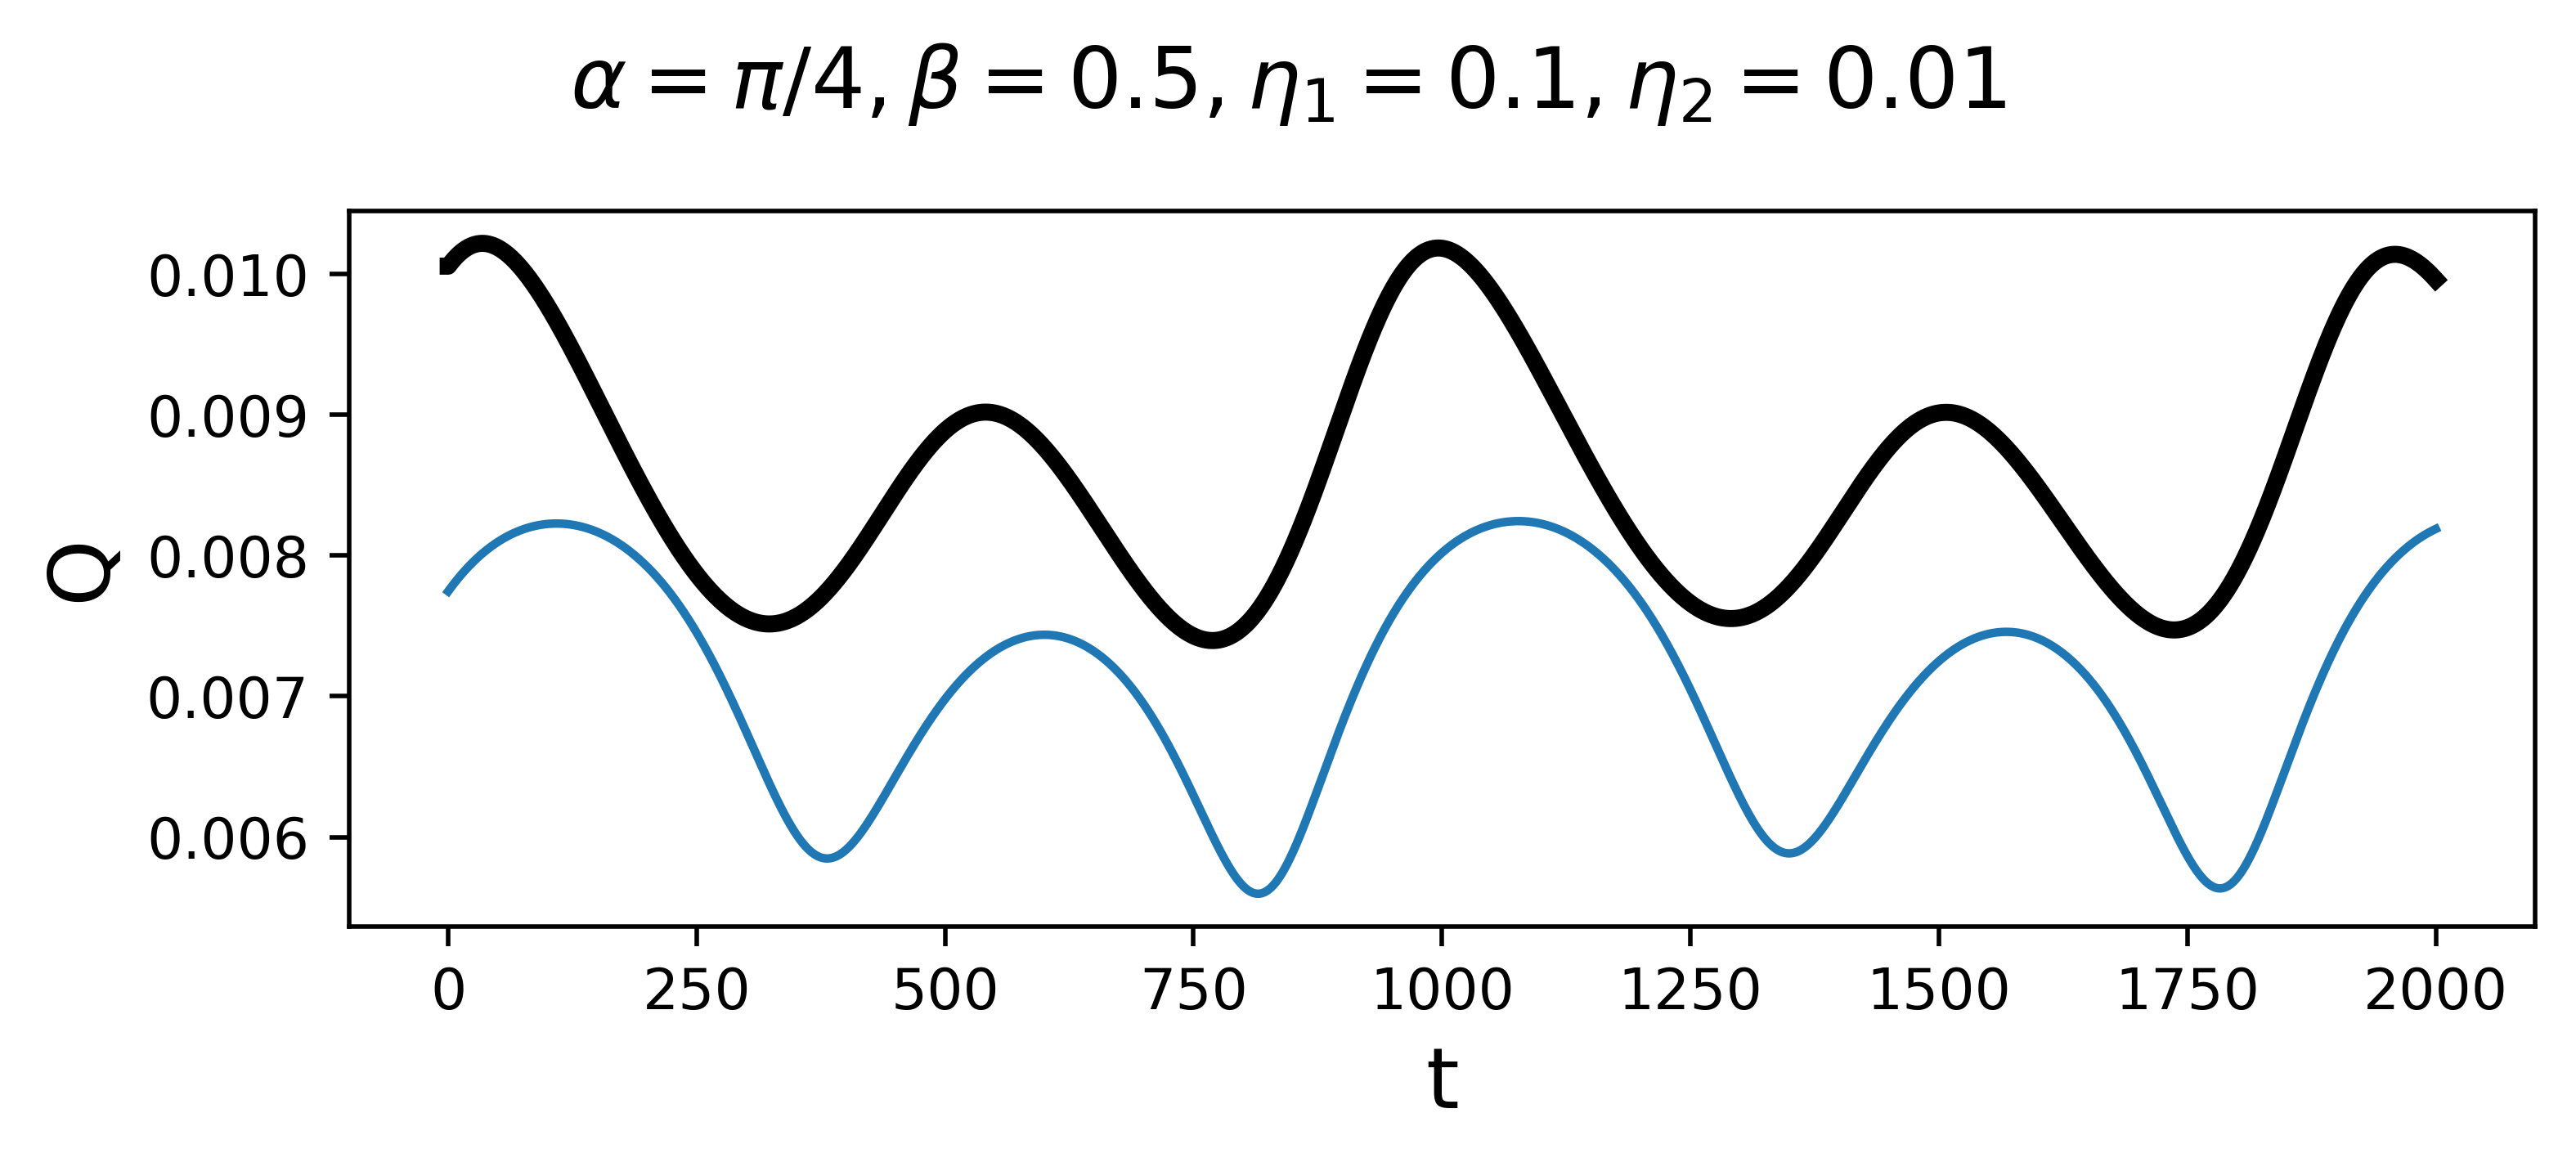

In [188]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,R2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,R2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

In [204]:
alpha = np.pi/4
beta = 0.5
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 2000
N1=N2 =N

In [214]:
T1 = np.r_[np.zeros(int((1/2 + eta1/2)*N)),np.pi* np.ones(N - int((1/2 + eta1/2)*N))]
np.random.seed(0)
a = np.random.normal(0,0.51,N//2)
T2 = np.r_[a,a+np.pi]
T2 = (T2 + np.pi )%(np.pi*2) - np.pi
Theta = np.r_[T1,T2]
t_end=2000
t = np.arange(0,t_end,0.1)

In [215]:
R2_init = np.abs(np.mean(np.exp(1j*T2)))
Q2_init = np.abs(np.mean(np.exp(2j*T2)))
print(R2_init,Q2_init)

5.687116766346677e-17 0.6022227843747567


In [216]:
thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,1))

In [217]:
T1r = thetas[:,N:]

In [218]:
a1_r = np.array([np.mean(np.exp((2*n-1)*1j*T1r),axis=1) for n in range(1,10)])
b1_r = np.array([np.mean(np.exp((2*n)*1j*T1r),axis=1) for n in range(1,10)])
a1s_r = np.array([np.mean(np.exp(-(2*n-1)*1j*T1r),axis=1) for n in range(1,10)])
b1s_r = np.array([np.mean(np.exp(-(2*n)*1j*T1r),axis=1) for n in range(1,10)])

# a1 = np.mean(np.exp(1j*T1s),axis=1)
# a2 = np.mean(np.exp(2j*T1s),axis=1)
# a3 = np.mean(np.exp(3j*T1s),axis=1)
# a4 = np.mean(np.exp(4j*T1s),axis=1)

Text(0, 0.5, '$f_{2n}$')

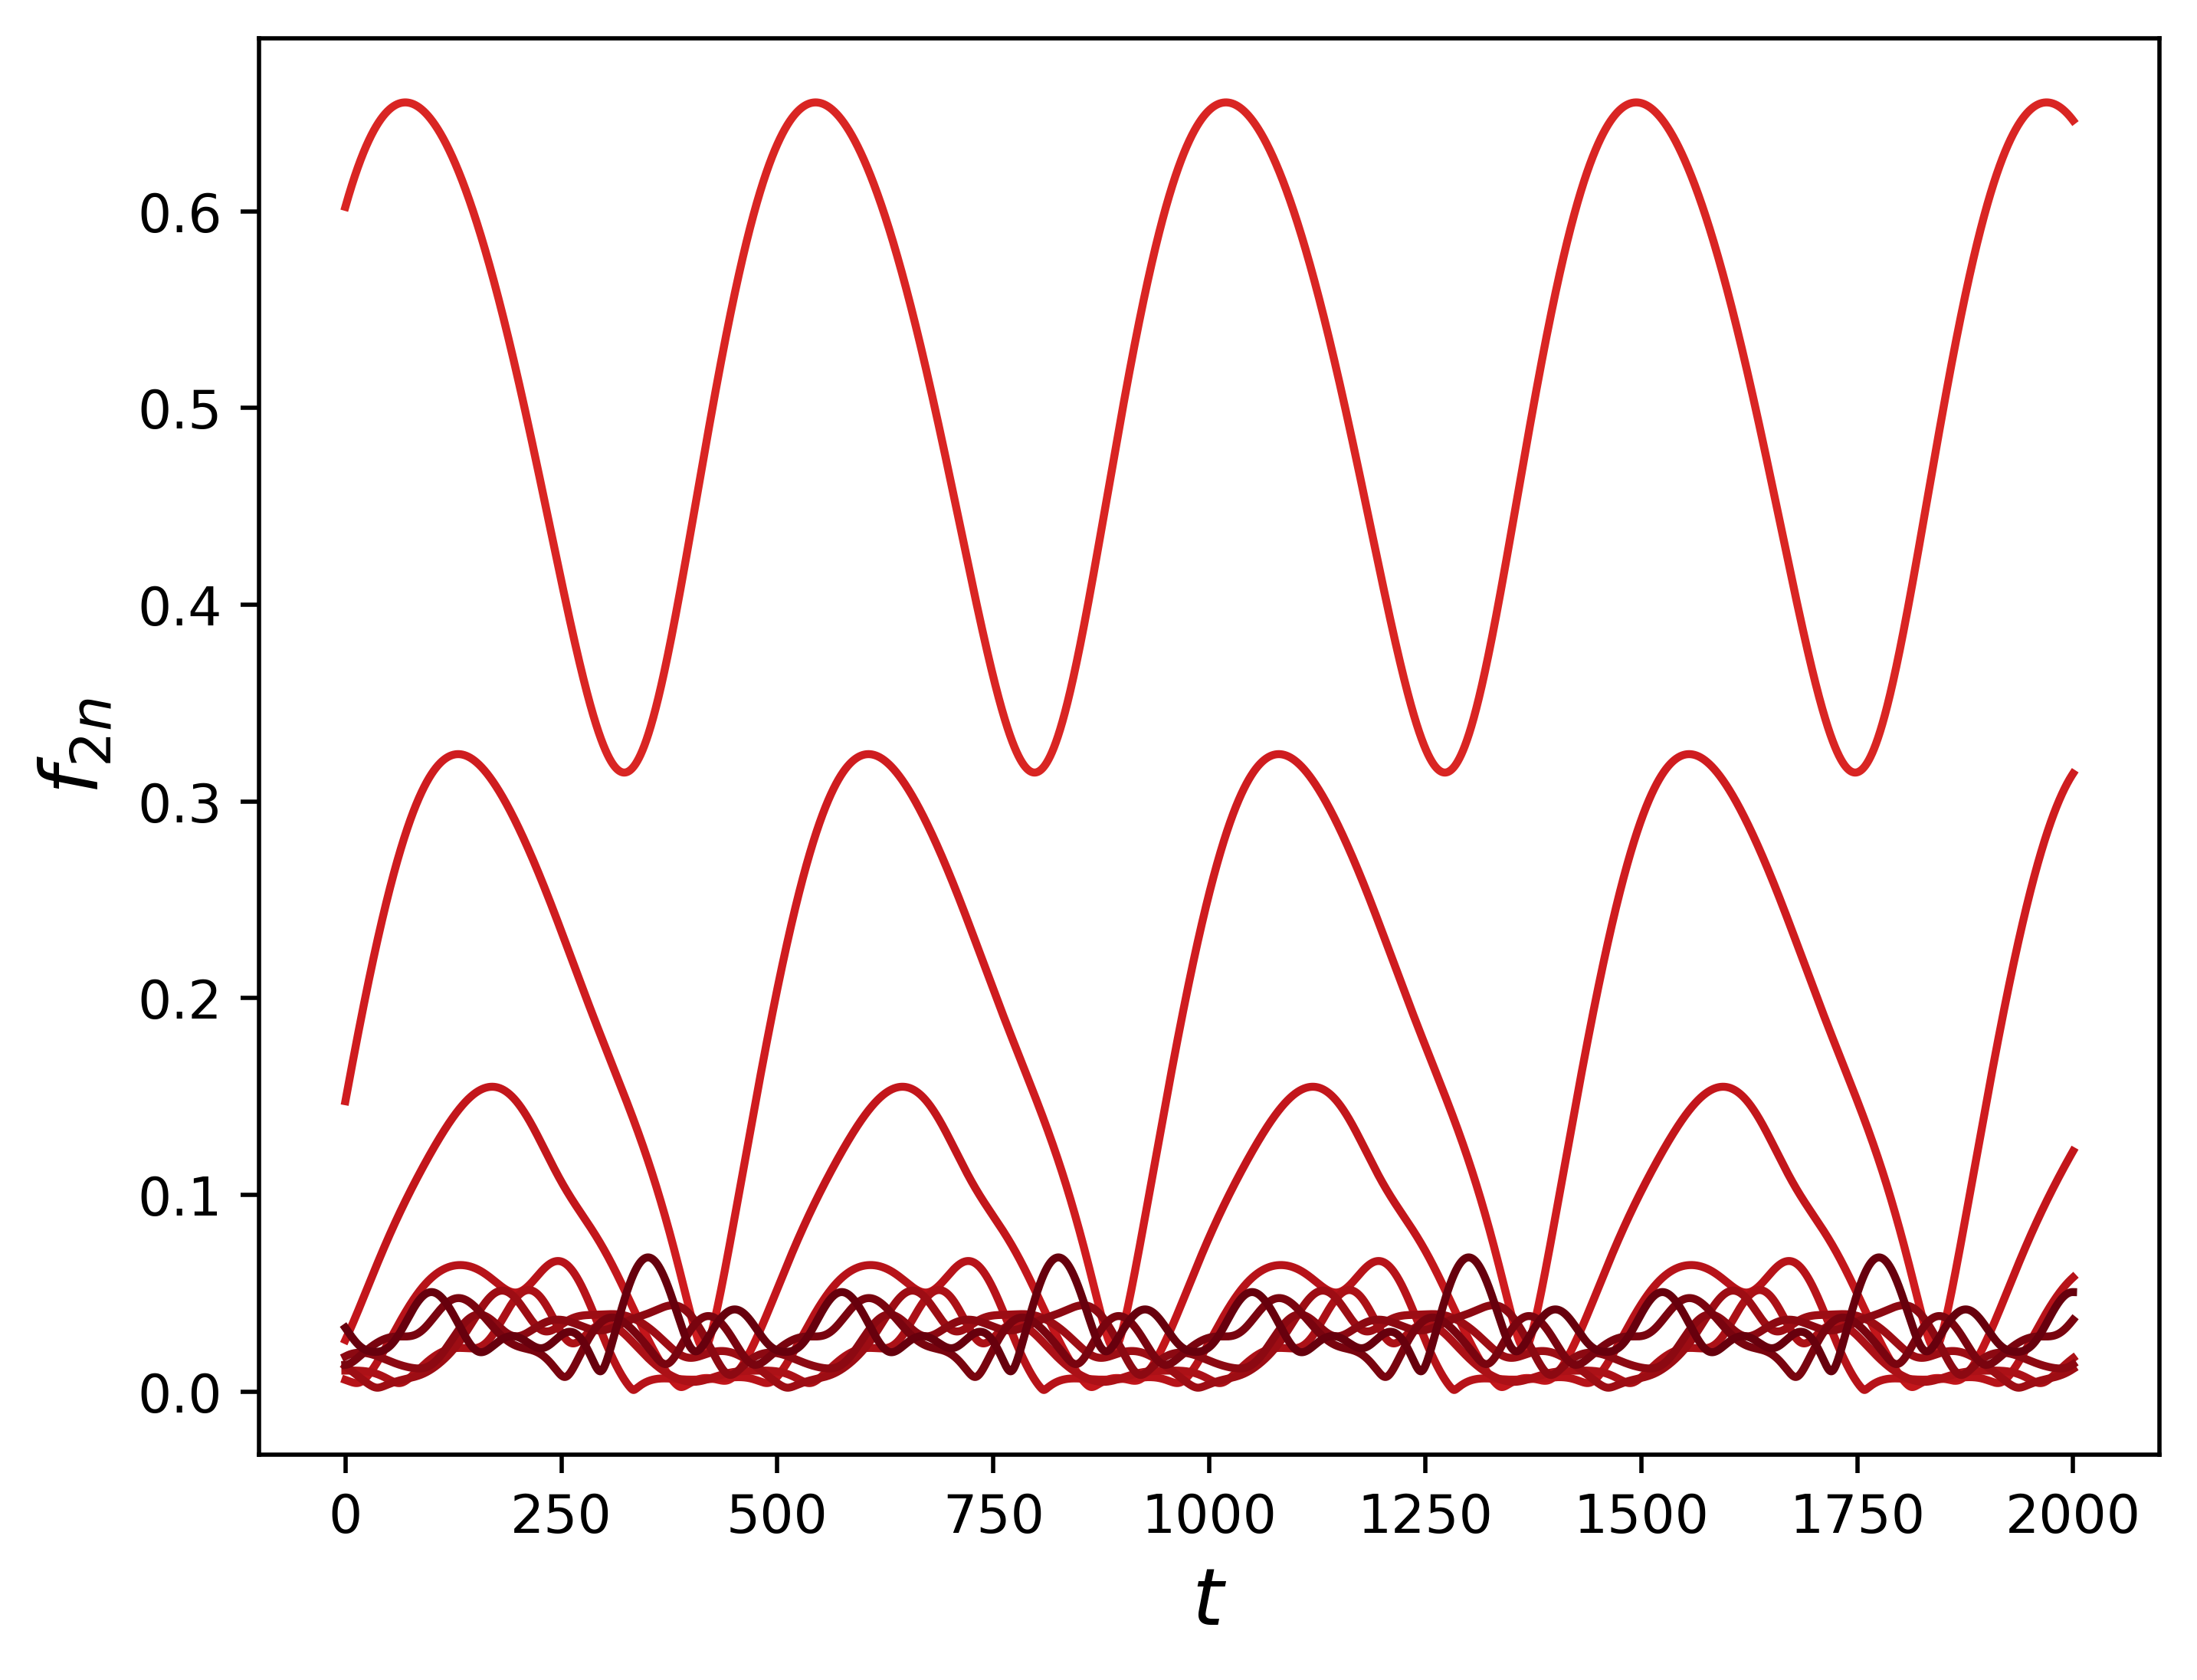

In [219]:
# plt.plot(t,(np.abs(b1_s)).T)
plt.figure(dpi=500)
colors = plt.cm.Reds(np.linspace(0.7, 1, 9))
ln = plt.plot(t, (np.abs(b1_r)).T)
for i, l in enumerate(ln):
    l.set_color(colors[i])

plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$f_{2n}$',fontsize=15)

# plt.plot(t,(np.abs(a1_r)).T)

Text(0, 0.5, '$f_{2n-1}$')

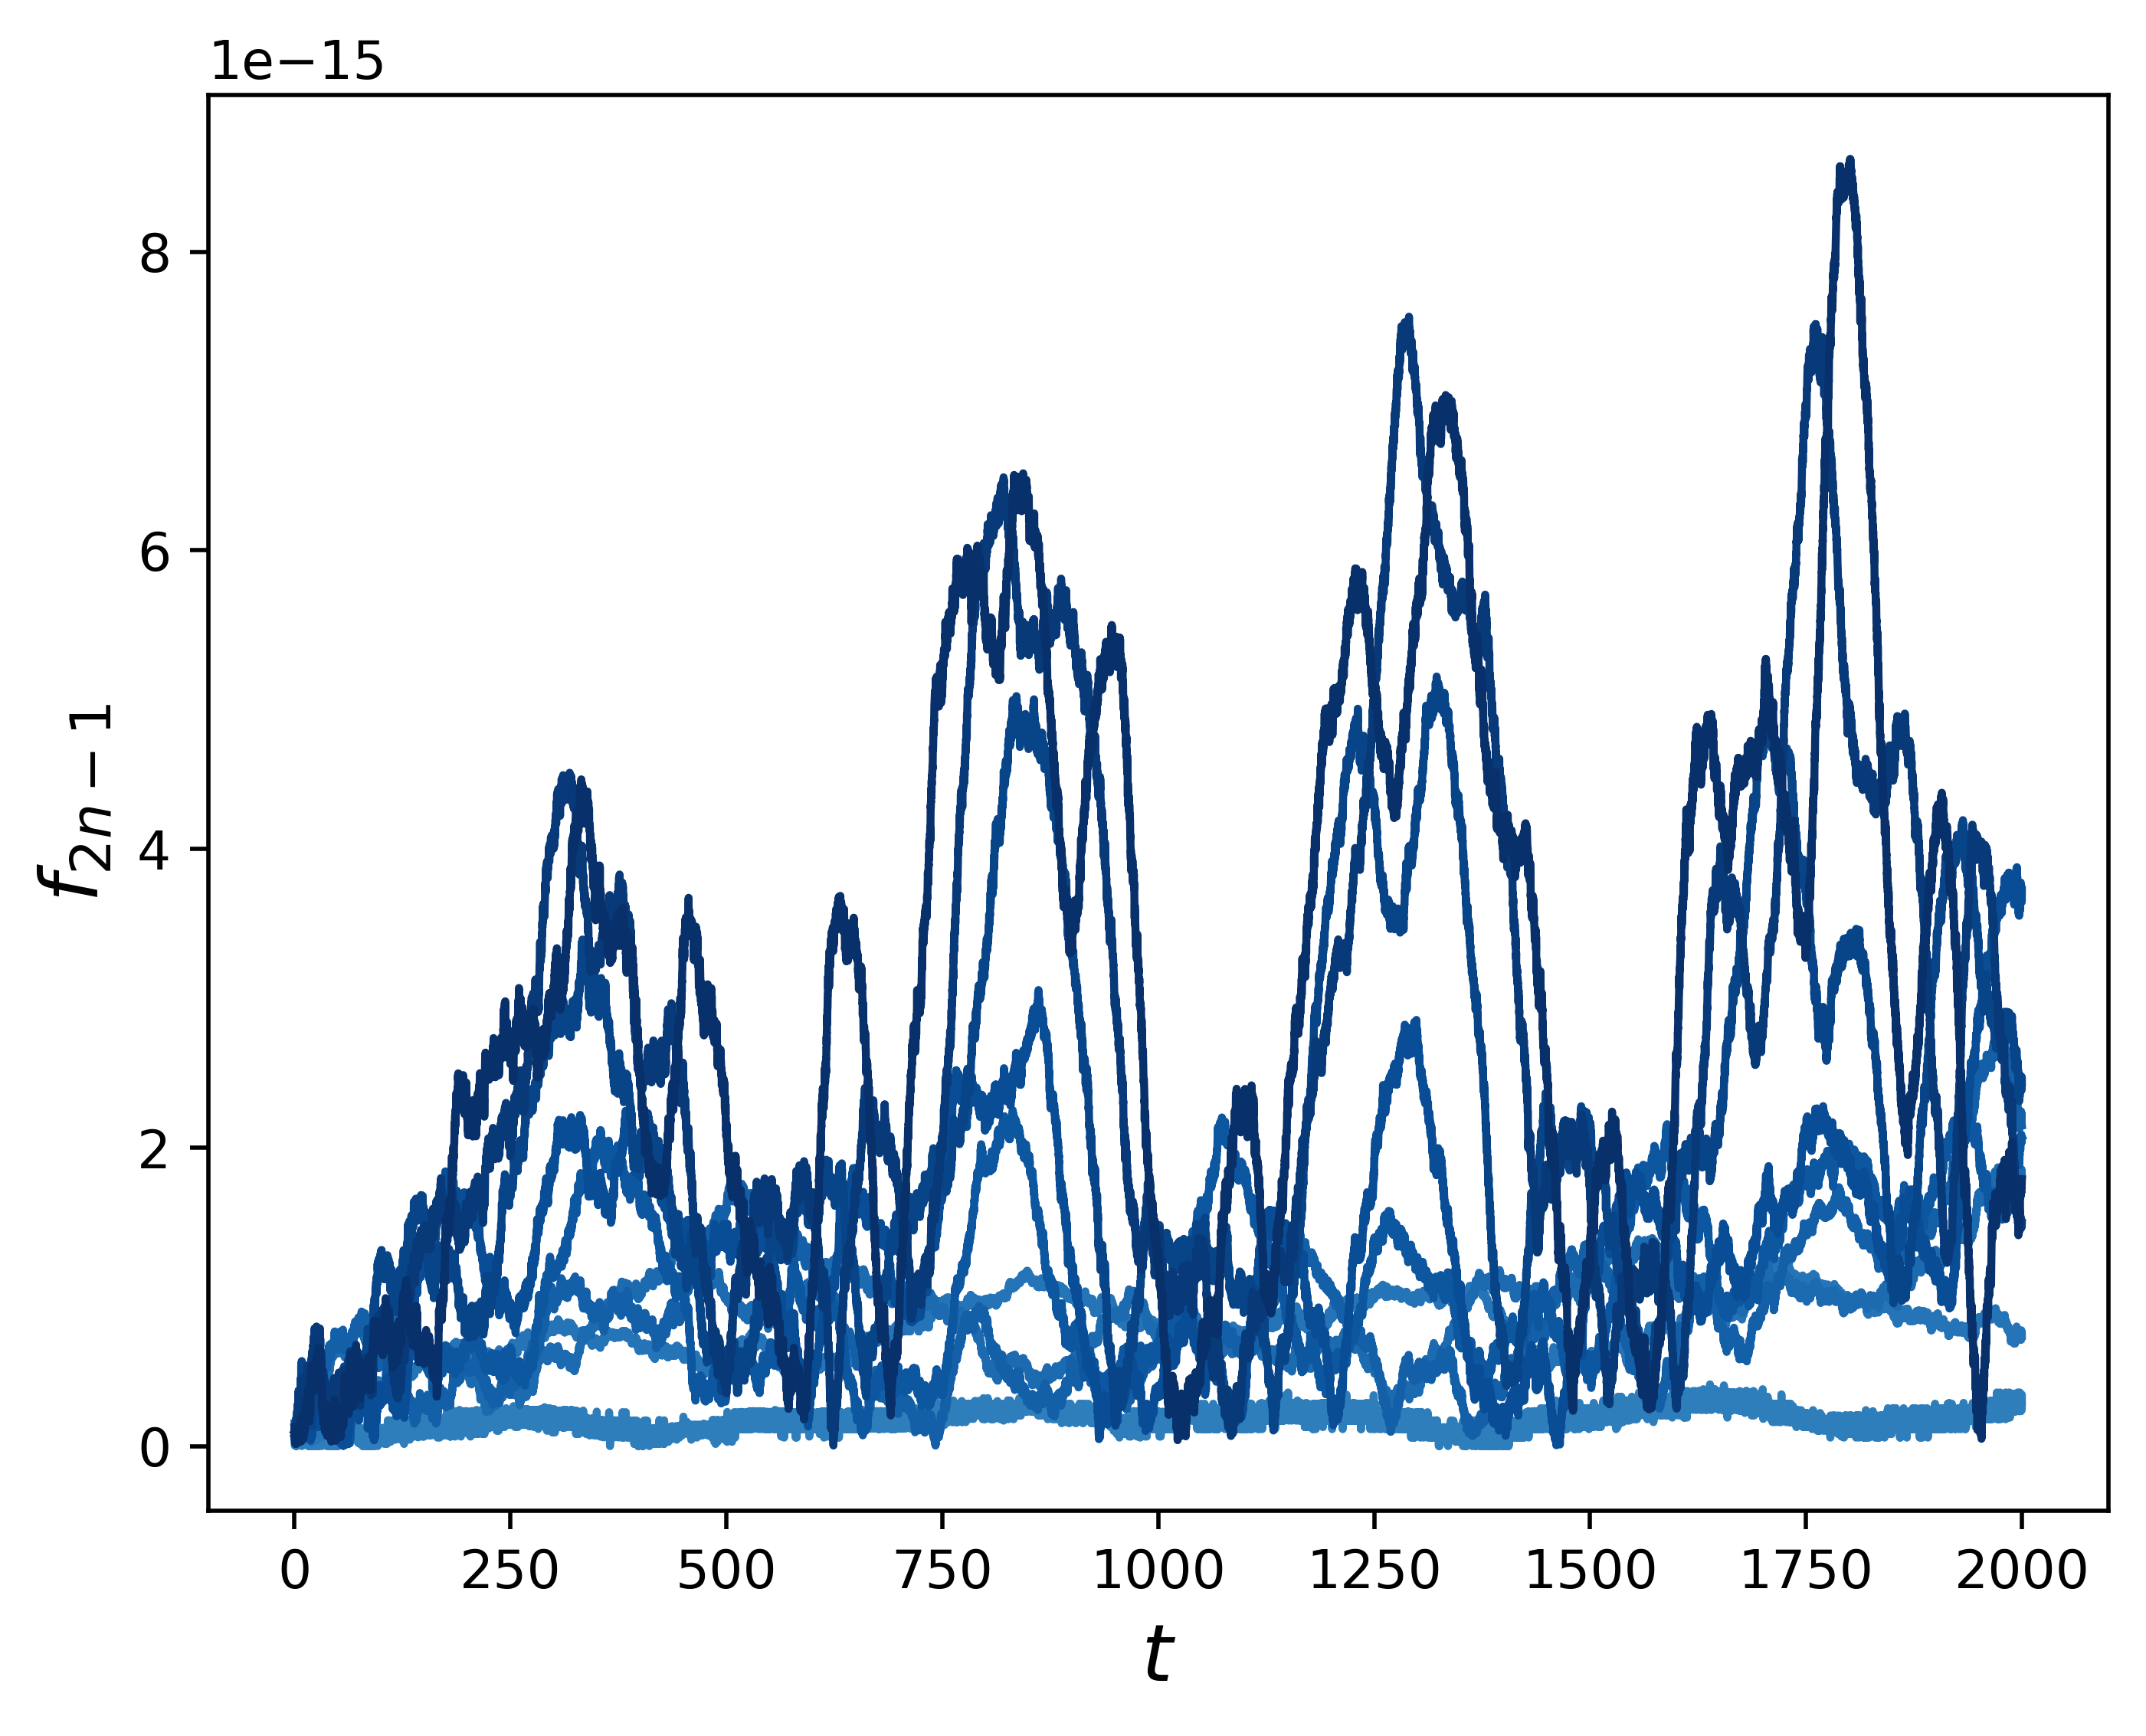

In [220]:
# plt.plot(t,(np.abs(b1_s)).T)
plt.figure(dpi=500)
colors = plt.cm.Blues(np.linspace(0.7, 1, a1_s.shape[0]))
ln = plt.plot(t, (np.abs(a1_r)).T)
for i, l in enumerate(ln):
    l.set_color(colors[i])

plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$f_{2n-1}$',fontsize=15)

# plt.plot(t,(np.abs(a1_r)).T)

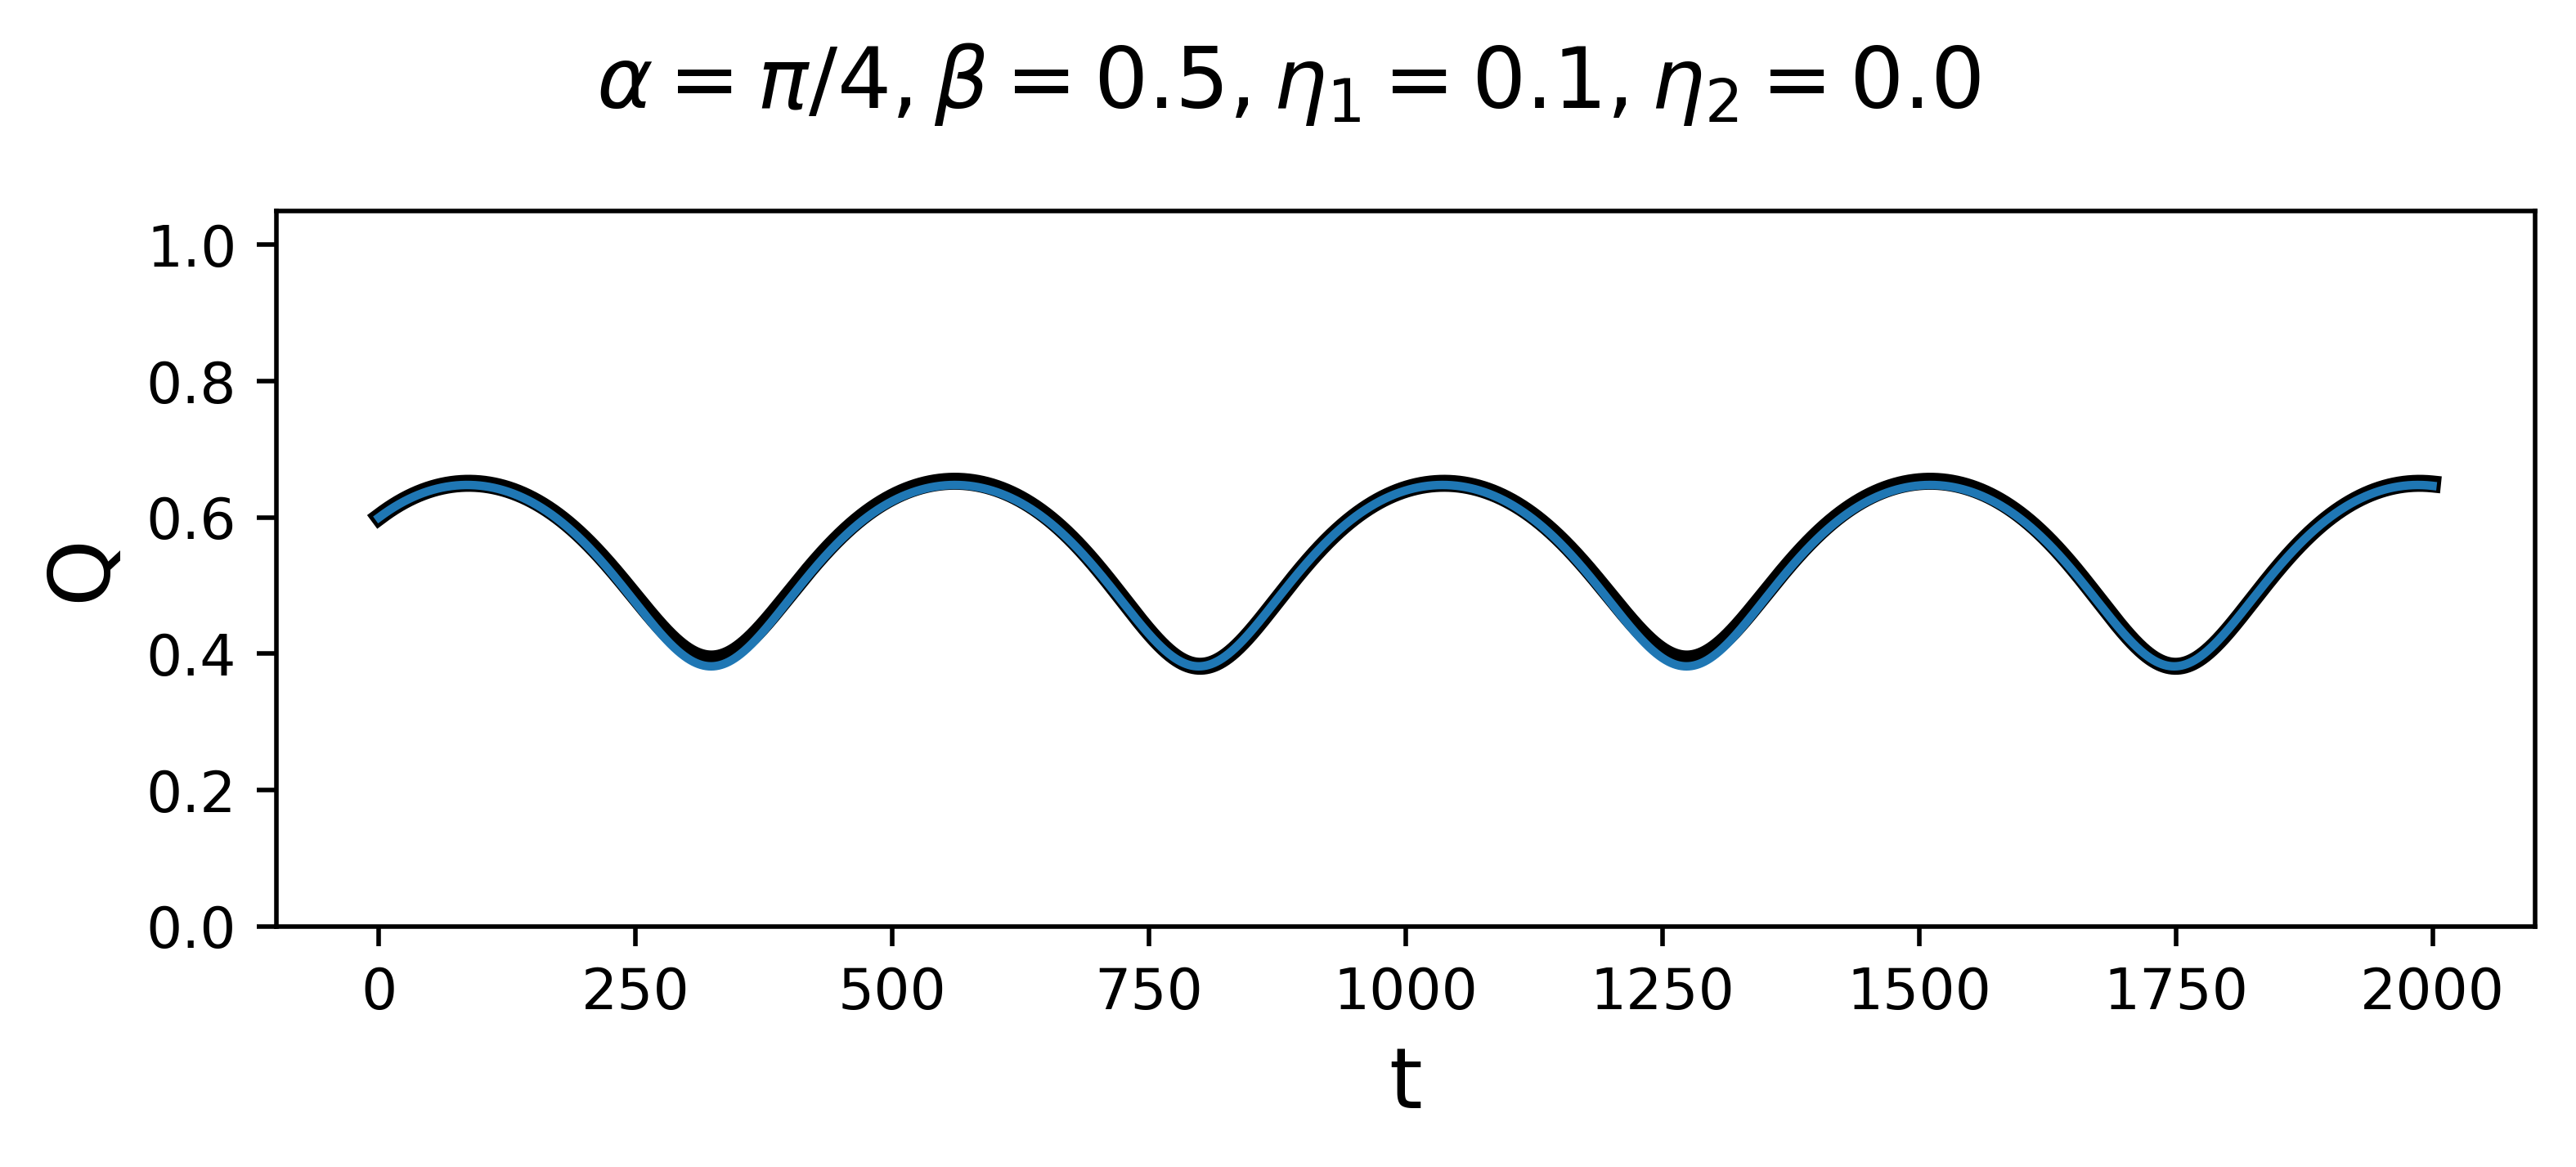

In [221]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,np.abs(b1_s[0]),label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
plt.ylim(0.0,1.05)
plt.tight_layout()

In [410]:
# a1s = np.sort(np.random.rand(5)) * np.exp(1j*(2*np.pi*np.random.rand(5)))
xs = np.linspace(-np.pi,np.pi,10000)
Q = 0.9
a1s = [Q**n for n in range(1,10)]


f = 0*xs
for i,n in enumerate(np.arange(1,len(a1s)+1)):
    f+= (a1s[i]*np.exp((2*n)*1j*xs) + a1s[i].conj()*np.exp((-2*n)*1j*xs)).real

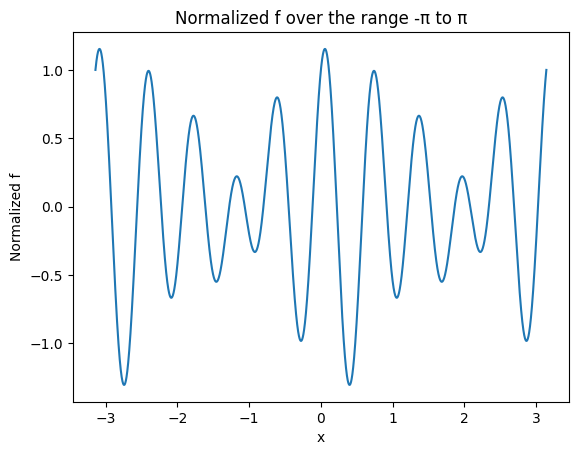

In [411]:
# Normalize f so that the sum is 1
f = f / np.sum(f)

# Plot the normalized f
plt.plot(xs, f)
plt.xlabel('x')
plt.ylabel('Normalized f')
plt.title('Normalized f over the range -π to π')
plt.show()

In [412]:
np.pi

3.141592653589793

In [413]:
np.where(xs>np.pi)

(array([], dtype=int64),)

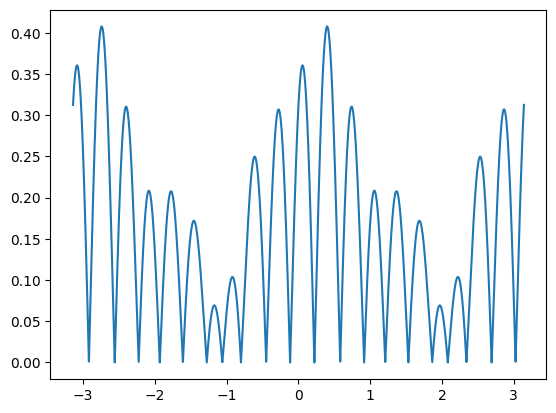

In [414]:
f_m = np.where(f<0,-f,0)
f_p = np.where(f>=0,f,0)
f_m = np.r_[f_m[len(xs)//2:],f_m[:len(xs)//2]]
F = f_m+f_p
F = F/np.sum(F)/(xs[1]-xs[0])
plt.plot(xs,F)
# plt.scatter((xs+np.pi)%(2+np.pi)-np.pi,f_m)

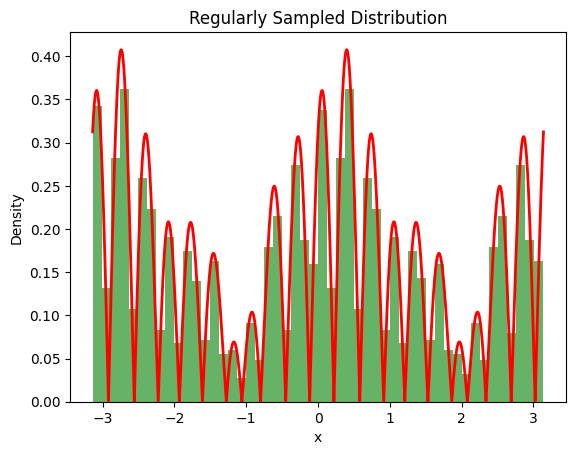

In [415]:
# Cumulative distribution function (CDF) 계산
cdf = np.cumsum(F)
cdf = cdf / cdf[-1]  # Normalize to make it a proper CDF

# Regular sampling points
num_samples = 2000  # 원하는 샘플 수
regular_samples = np.linspace(cdf[0], cdf[-1], num_samples)

# Interpolation function for inverse CDF
inverse_cdf_func = interp1d(cdf, xs, kind='linear')

# Regularly sampled values from the distribution
sampled_values = inverse_cdf_func(regular_samples)

# Plot the sampled values
plt.hist(sampled_values, bins=50, density=True, alpha=0.6, color='g')
plt.plot(xs, F, 'r-', lw=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Regularly Sampled Distribution')
plt.show()

In [417]:
T2 = sampled_values

In [422]:
N = 2000

In [423]:
T1 = np.r_[np.zeros(int((1/2 + eta1/2)*N)),np.pi* np.ones(N - int((1/2 + eta1/2)*N))]
np.random.seed(0)
a = np.random.normal(0,0.51,N//2)
# T2 = np.r_[a,a+np.pi]

T2 = (T2 + np.pi )%(np.pi*2) - np.pi
Theta = np.r_[T1,T2]
t_end=2000
t = np.arange(0,t_end,0.1)

In [424]:
R2_init = np.abs(np.mean(np.exp(1j*T2)))
Q2_init = np.abs(np.mean(np.exp(2j*T2)))
print(R2_init,Q2_init)

0.0005852699888405615 0.26713047497060083


In [425]:
N1 = N2 = 2000

In [426]:
thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,1))

In [429]:
R1_2,R2_2,Q1_2,Q2_2,_ = get_RQ_MOA2(1,Q2_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

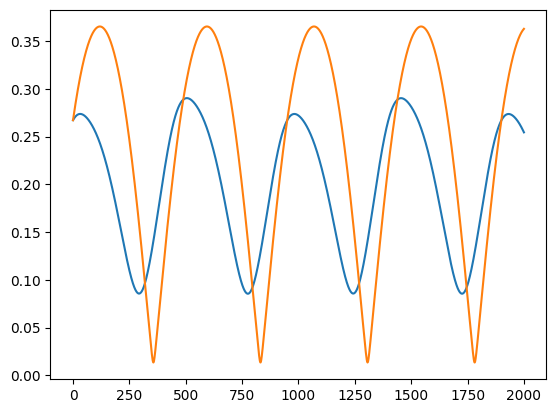

In [431]:
plt.plot(t,np.abs(Z2bs))
plt.plot(t,Q2_2)

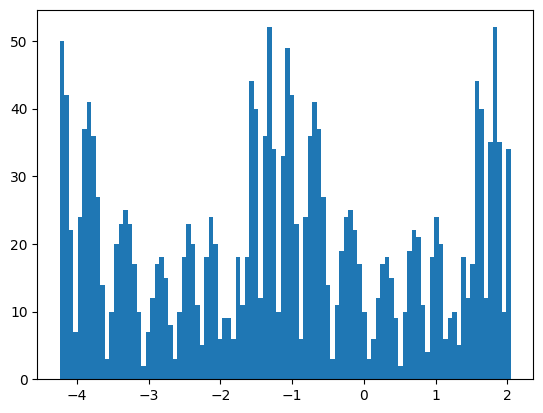

In [435]:
plt.hist(thetas[-1][N:],bins=100);

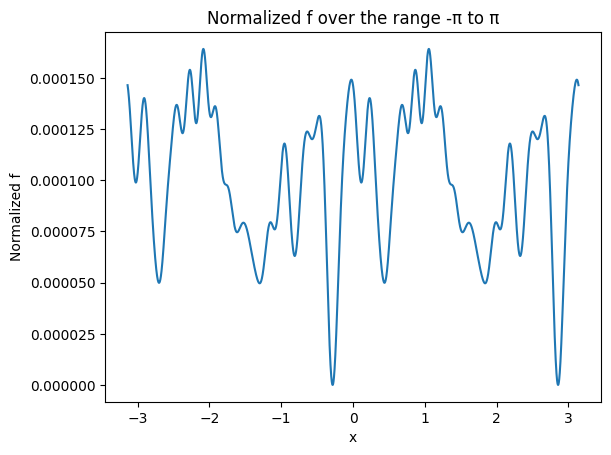

In [354]:
# f의 최소값을 0보다 크게 만들기 위해 적절한 상수를 더해줍니다.
f_min = np.min(f)
f_shifted = f - f_min + 0.001  # 최소값이 0.01이 되도록 상수 더하기

# f_shifted를 정규화하여 전체 합이 1이 되도록 합니다.
f_normalized = f_shifted / np.sum(f_shifted)

# 결과를 확인하기 위해 f_normalized를 출력합니다.
plt.plot(xs, f_normalized)
plt.xlabel('x')
plt.ylabel('Normalized f')
plt.title('Normalized f over the range -π to π')
plt.show()

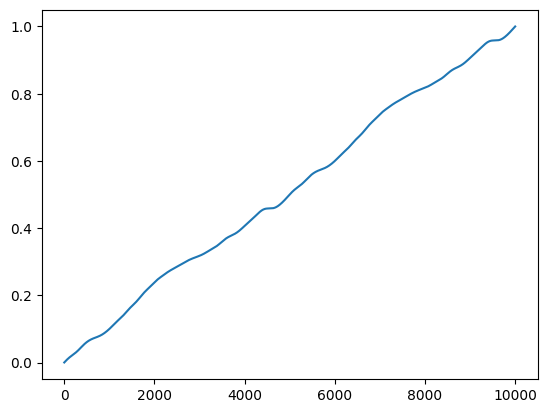

In [357]:
plt.plot(np.cumsum(f_normalized))

In [296]:
f = f/np.sum(f)

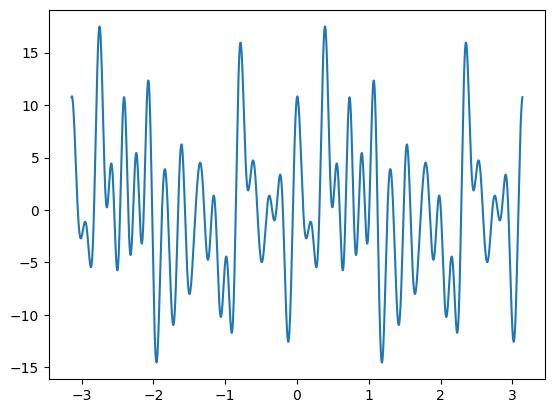

In [301]:
plt.plot(xs,f)

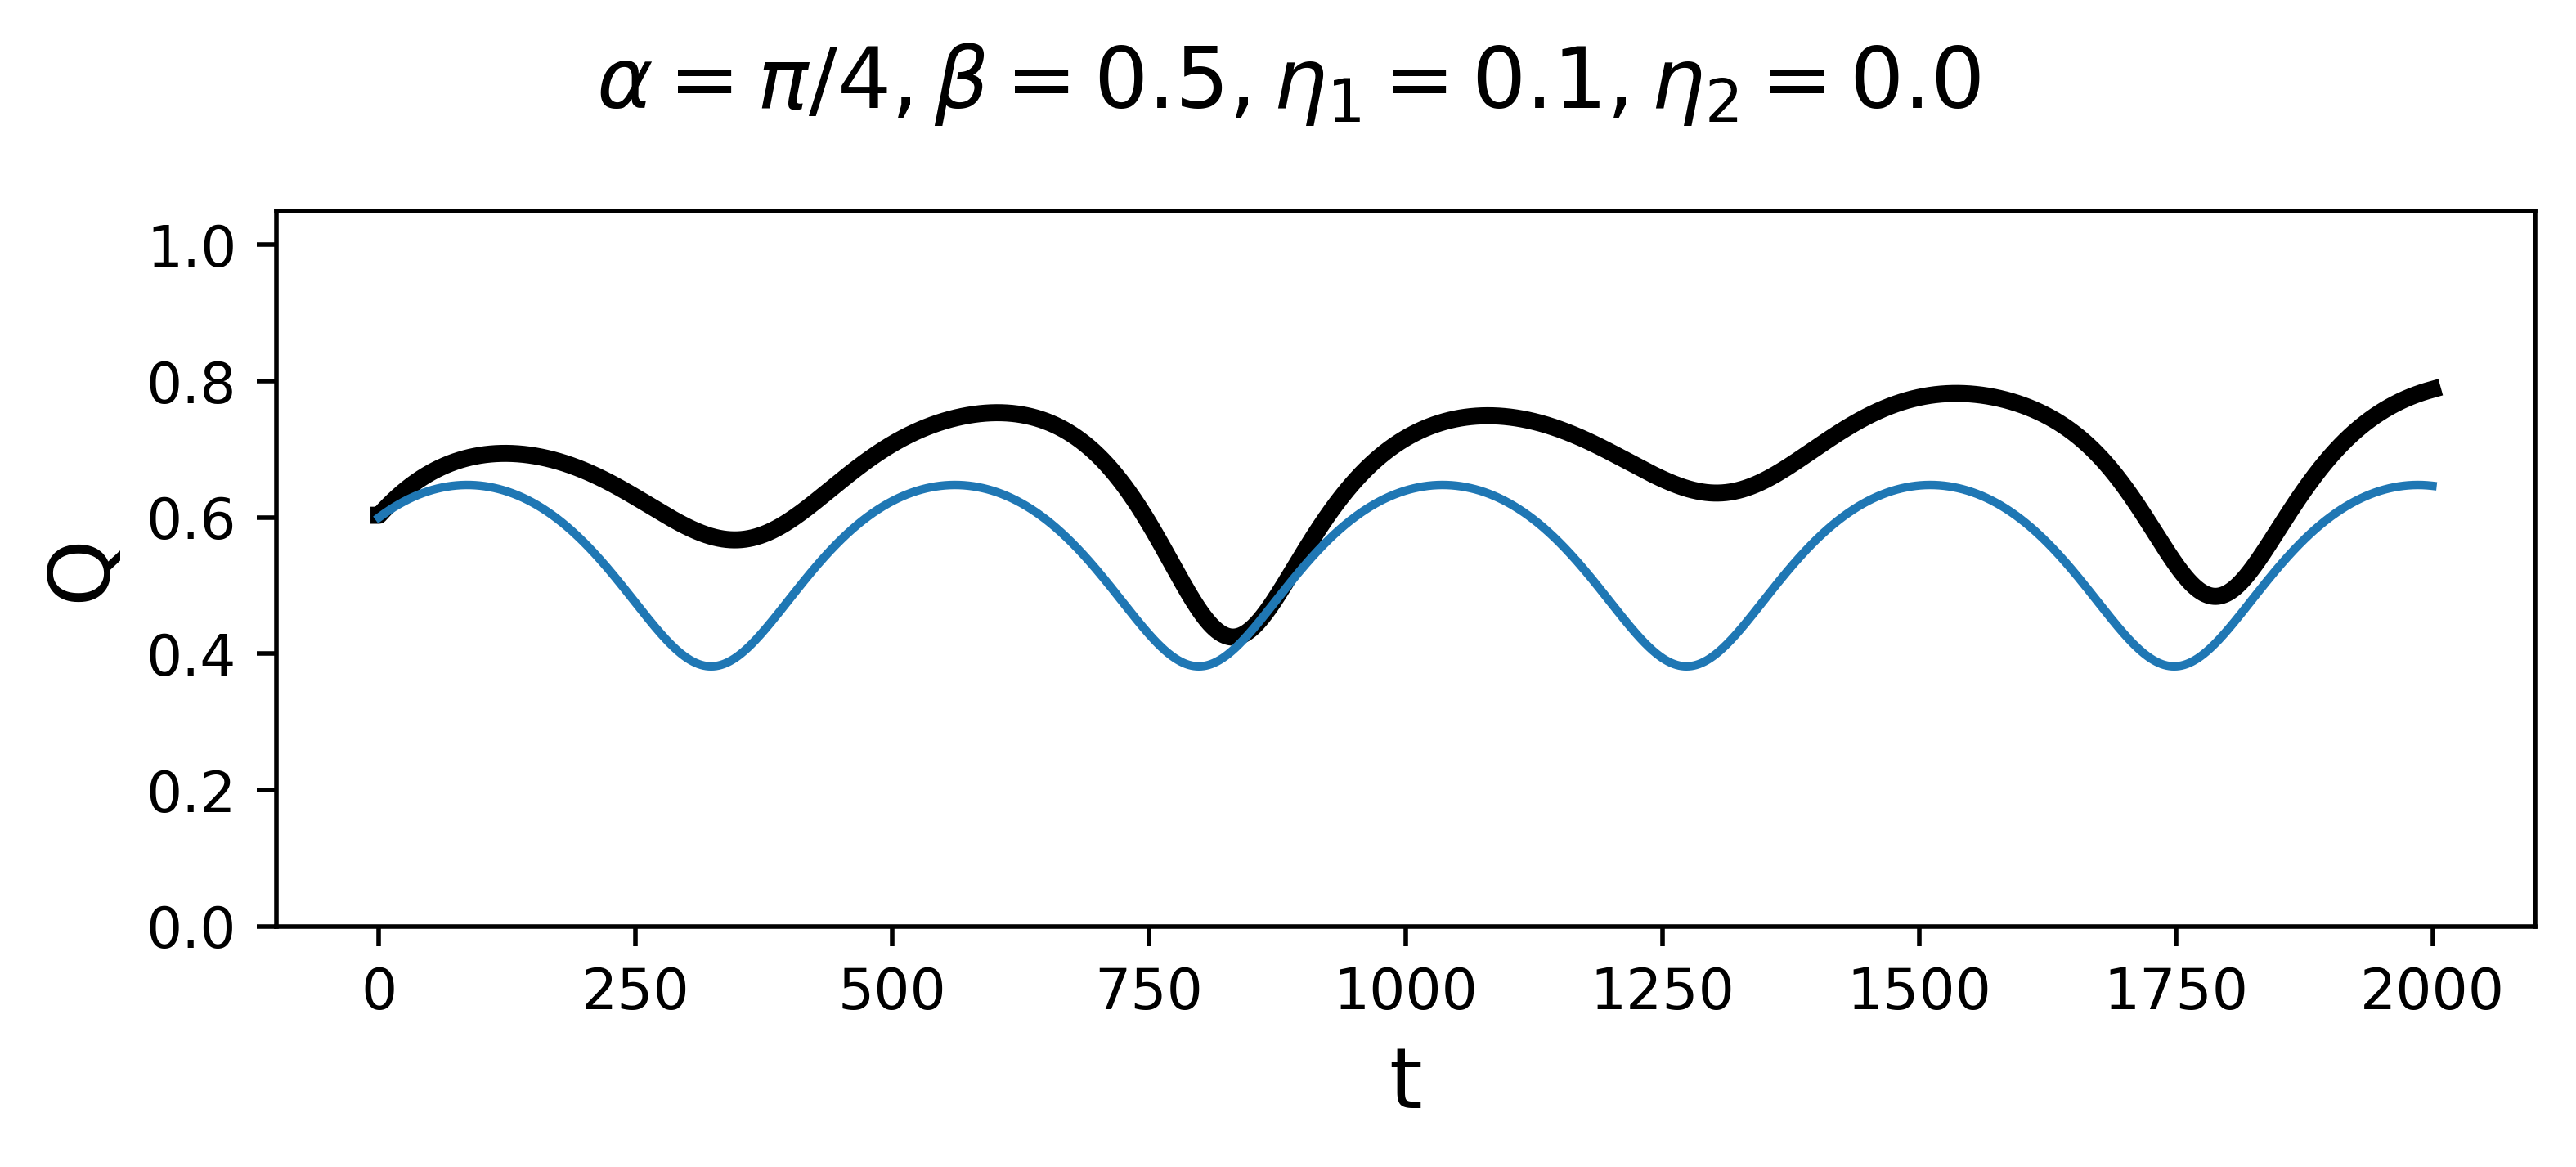

In [428]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
plt.ylim(0.0,1.05)
plt.tight_layout()

# simulation with different $\eta_1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2
from Simul import dZ2_dt,RK4,to_complex,dZ_dt,get_R_simul_wfT,RK4_ZZ
from parfor import parfor

from tqdm.notebook import tqdm
from parfor import parfor

In [33]:
Q_2OA = {}
Q_2SI = {}

In [34]:
alpha = np.pi/4
beta = 0.5
eta1 = 0.2
eta2 = 0.0
shift = 0
N = 2000

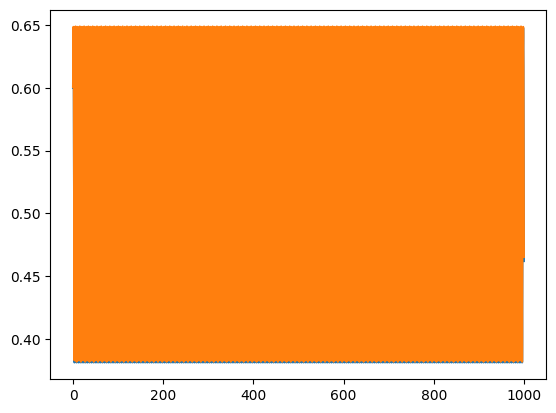

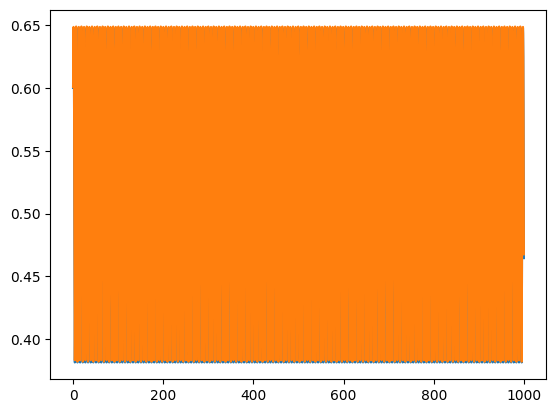

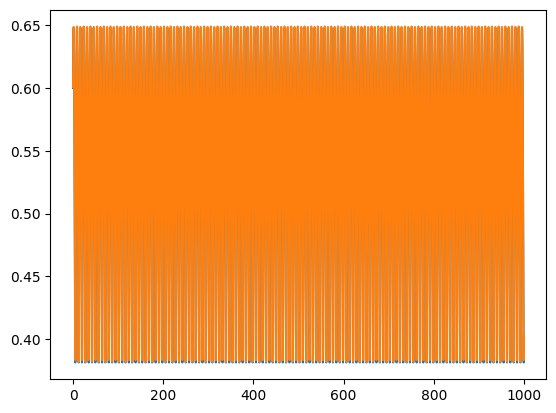

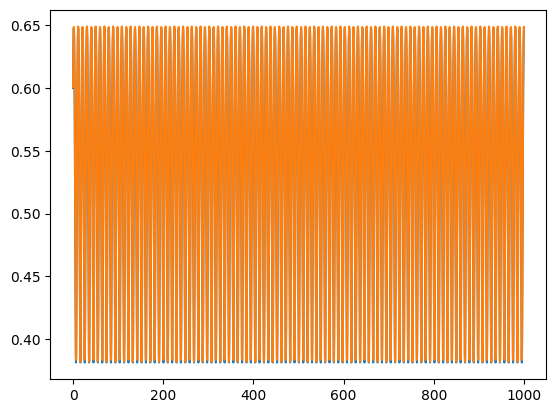

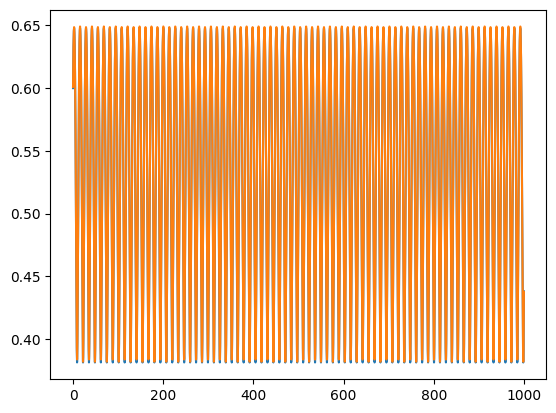

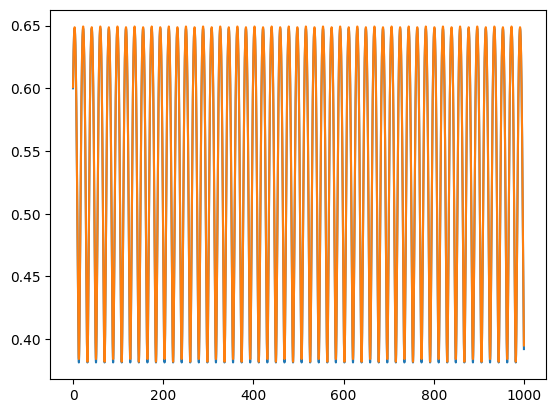

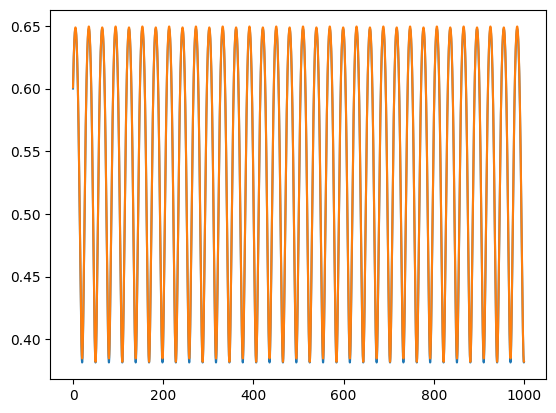

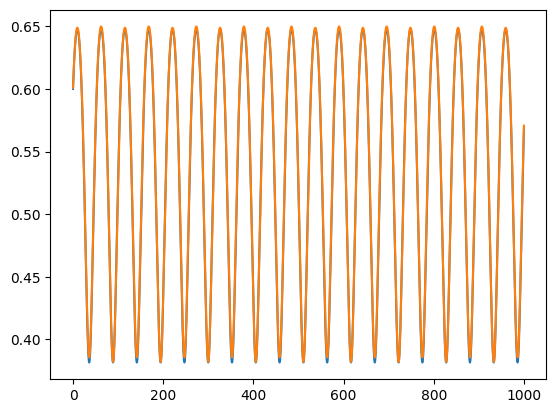

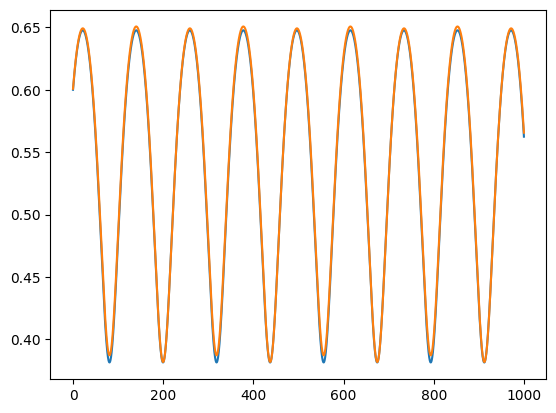

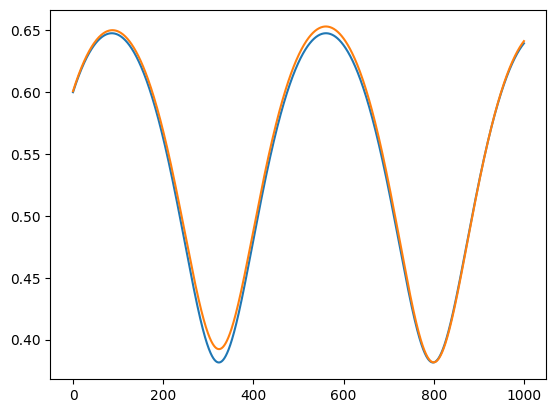

In [35]:
for eta1 in eta1s:
    t_end = 1000
    Q_init = 0.6
    dt = 0.01
    # R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
    R1_2,R2_2,Q1_2,Q_2OA[eta1],_ = get_RQ_MOA2(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=dt)
    R1_s,R2_s,Q1_s,Q_2SI[eta1],t,thetas = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=dt,seed=None)
    plt.figure()
    plt.plot(t,Q_2OA[eta1])
    plt.plot(t,Q_2SI[eta1])


In [26]:
eta1_0 = 0.1
# eta1 = 1.0

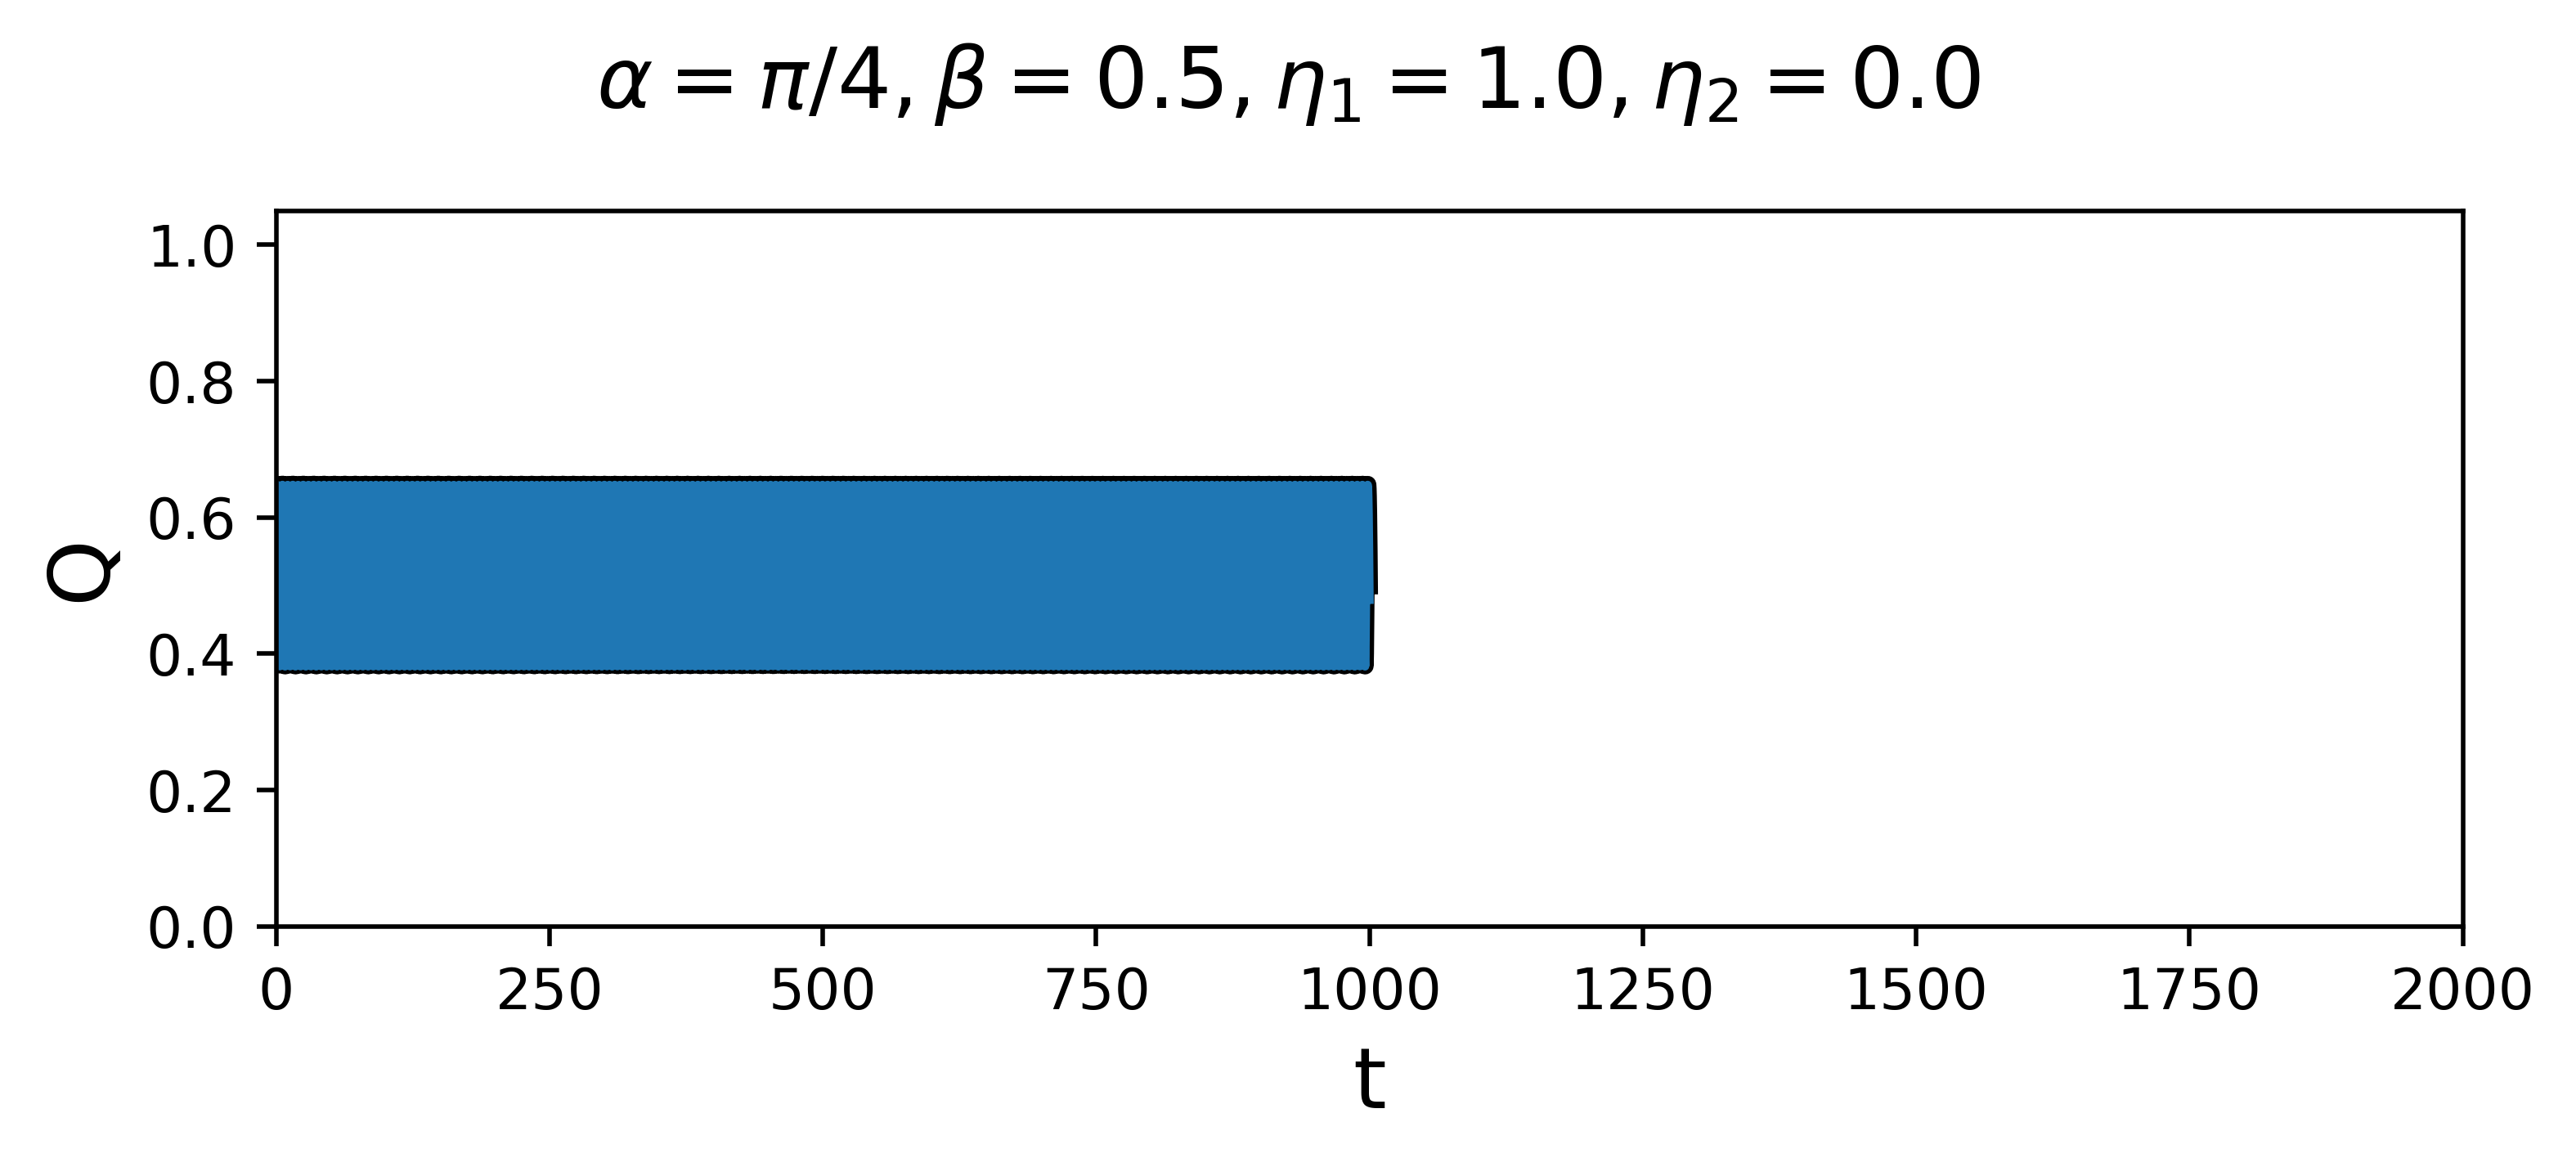

In [27]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q_2SI[eta1],label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q_2OA[eta1],label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
plt.xlim(0,2000)
plt.ylim(0.0,1.05)
plt.tight_layout()

In [24]:
eta1s = list(Q_2OA.keys())

NameError: name 'eta1_0' is not defined

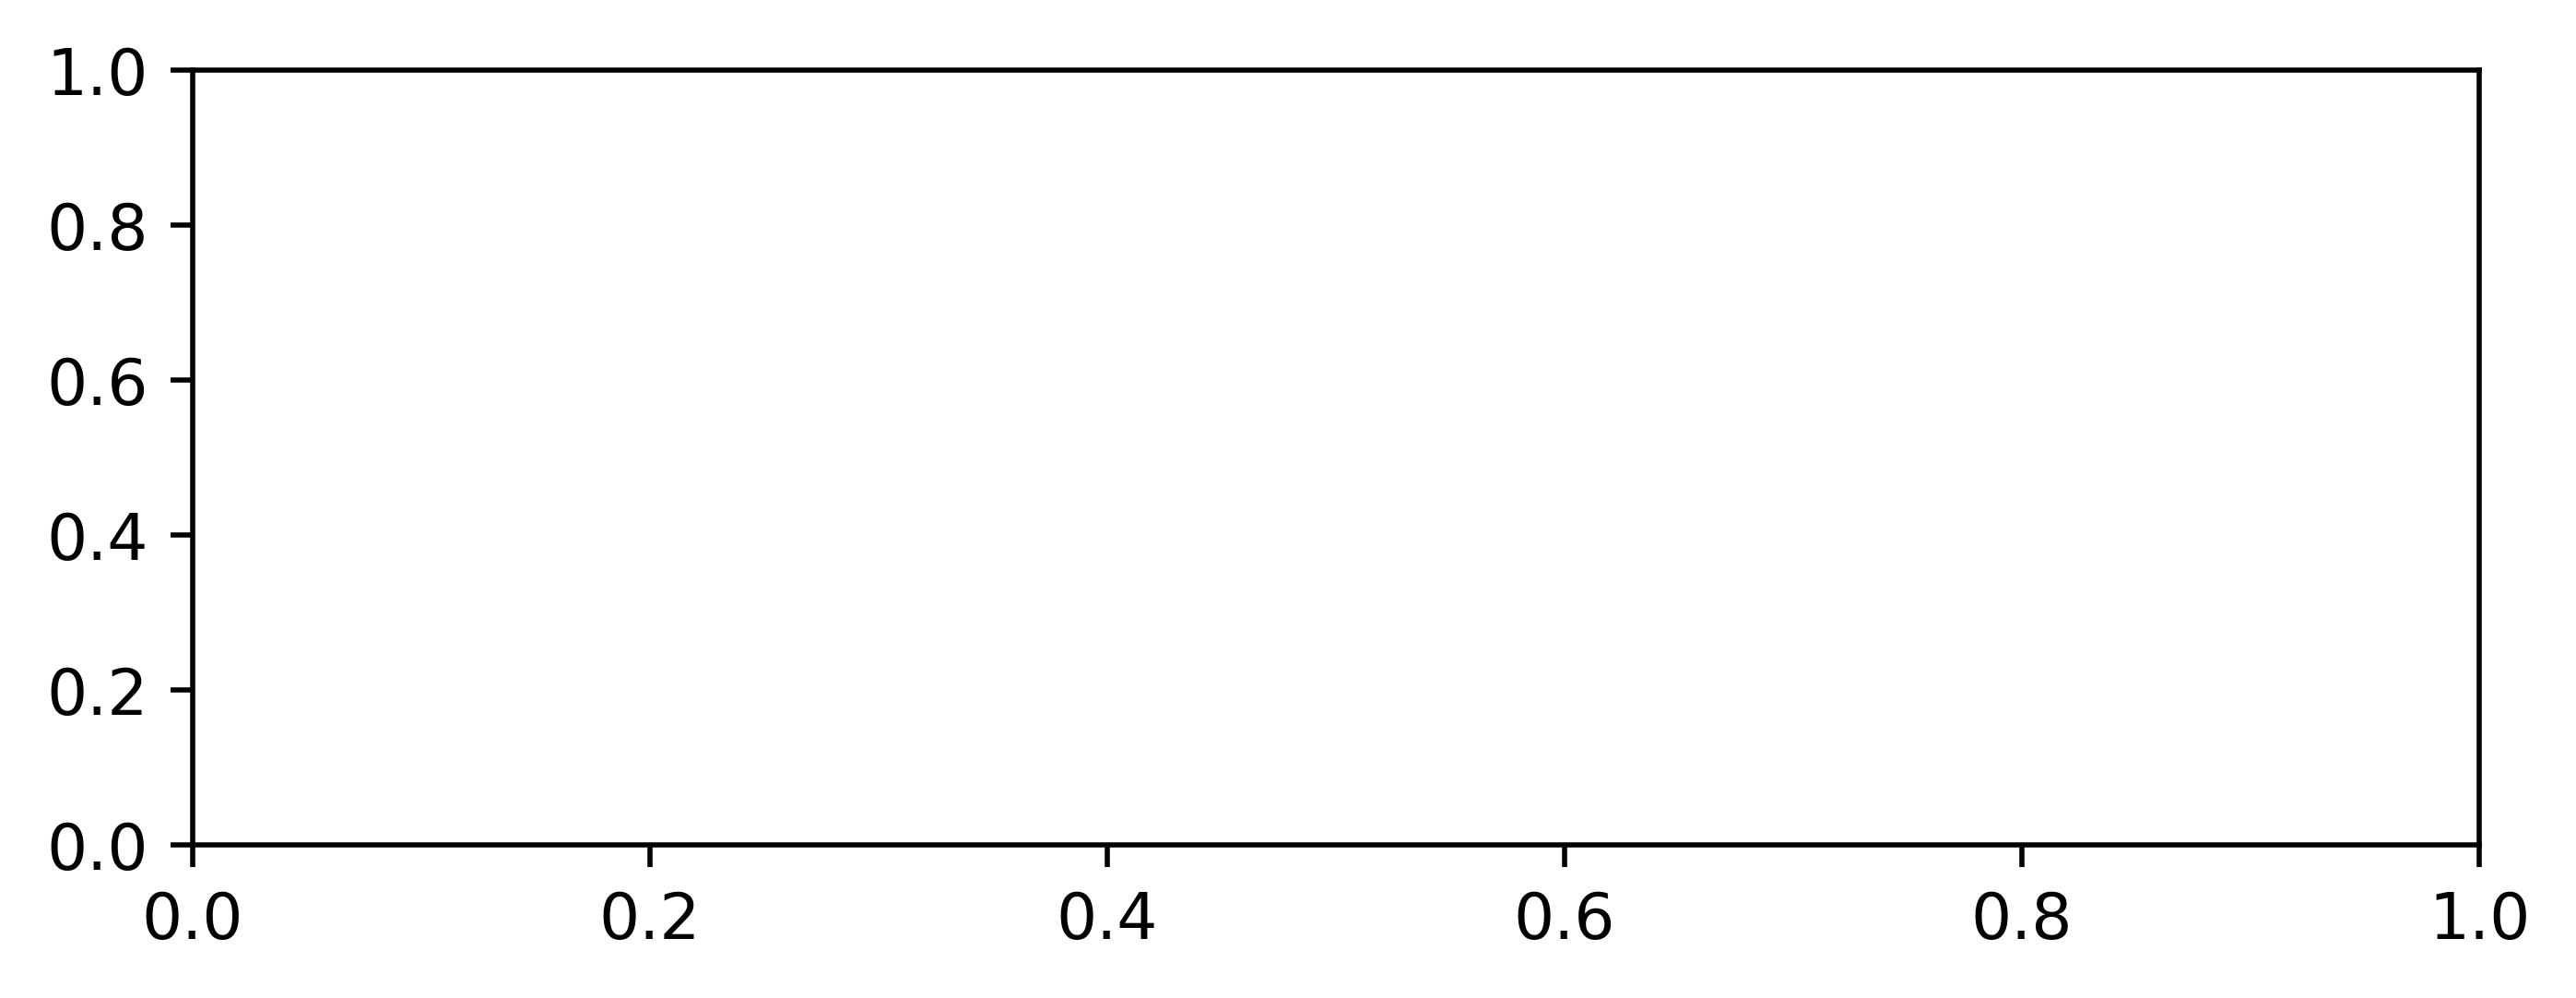

In [25]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)

for eta1 in eta1s:
    plt.plot((eta1/eta1_0)**2*t,Q_2SI[eta1],label='Simulation',lw=1,zorder=0)
    # plt.plot(t,Q2,label=r'OA ansatz $n=1$')
    plt.plot((eta1/eta1_0)**2*t,Q_2OA[eta1],label='OA ansatz $n>1$',color='blue')        

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel(r'$\left(\eta_{1}/\eta_{1,0}\right)^2 t$',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_2 = {eta2}$',fontsize=15)
plt.xlim(0,2000)
plt.ylim(0.0,1.05)
plt.tight_layout()

In [29]:
t

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.997e+02, 9.998e+02,
       9.999e+02])

1.0 0.0032829485012123016 2.7158943649574496e-08
0.9 0.0030256209564347714 1.4315609031534393e-08
0.8 0.002839585448160098 6.063428759084388e-09
0.7 0.002738307055214606 4.0752915786423927e-07
0.6 0.0027490849779830406 1.1186522153039391e-08
0.5 0.002917441085893202 1.6005555325548926e-08
0.4 0.00331369123775227 3.578580165530809e-08
0.3 0.004103794451391918 6.9973393745925705e-09
0.2 0.005775653073410214 1.1093527318983831e-08
0.1 0.0108516435618643 7.291539838583105e-08


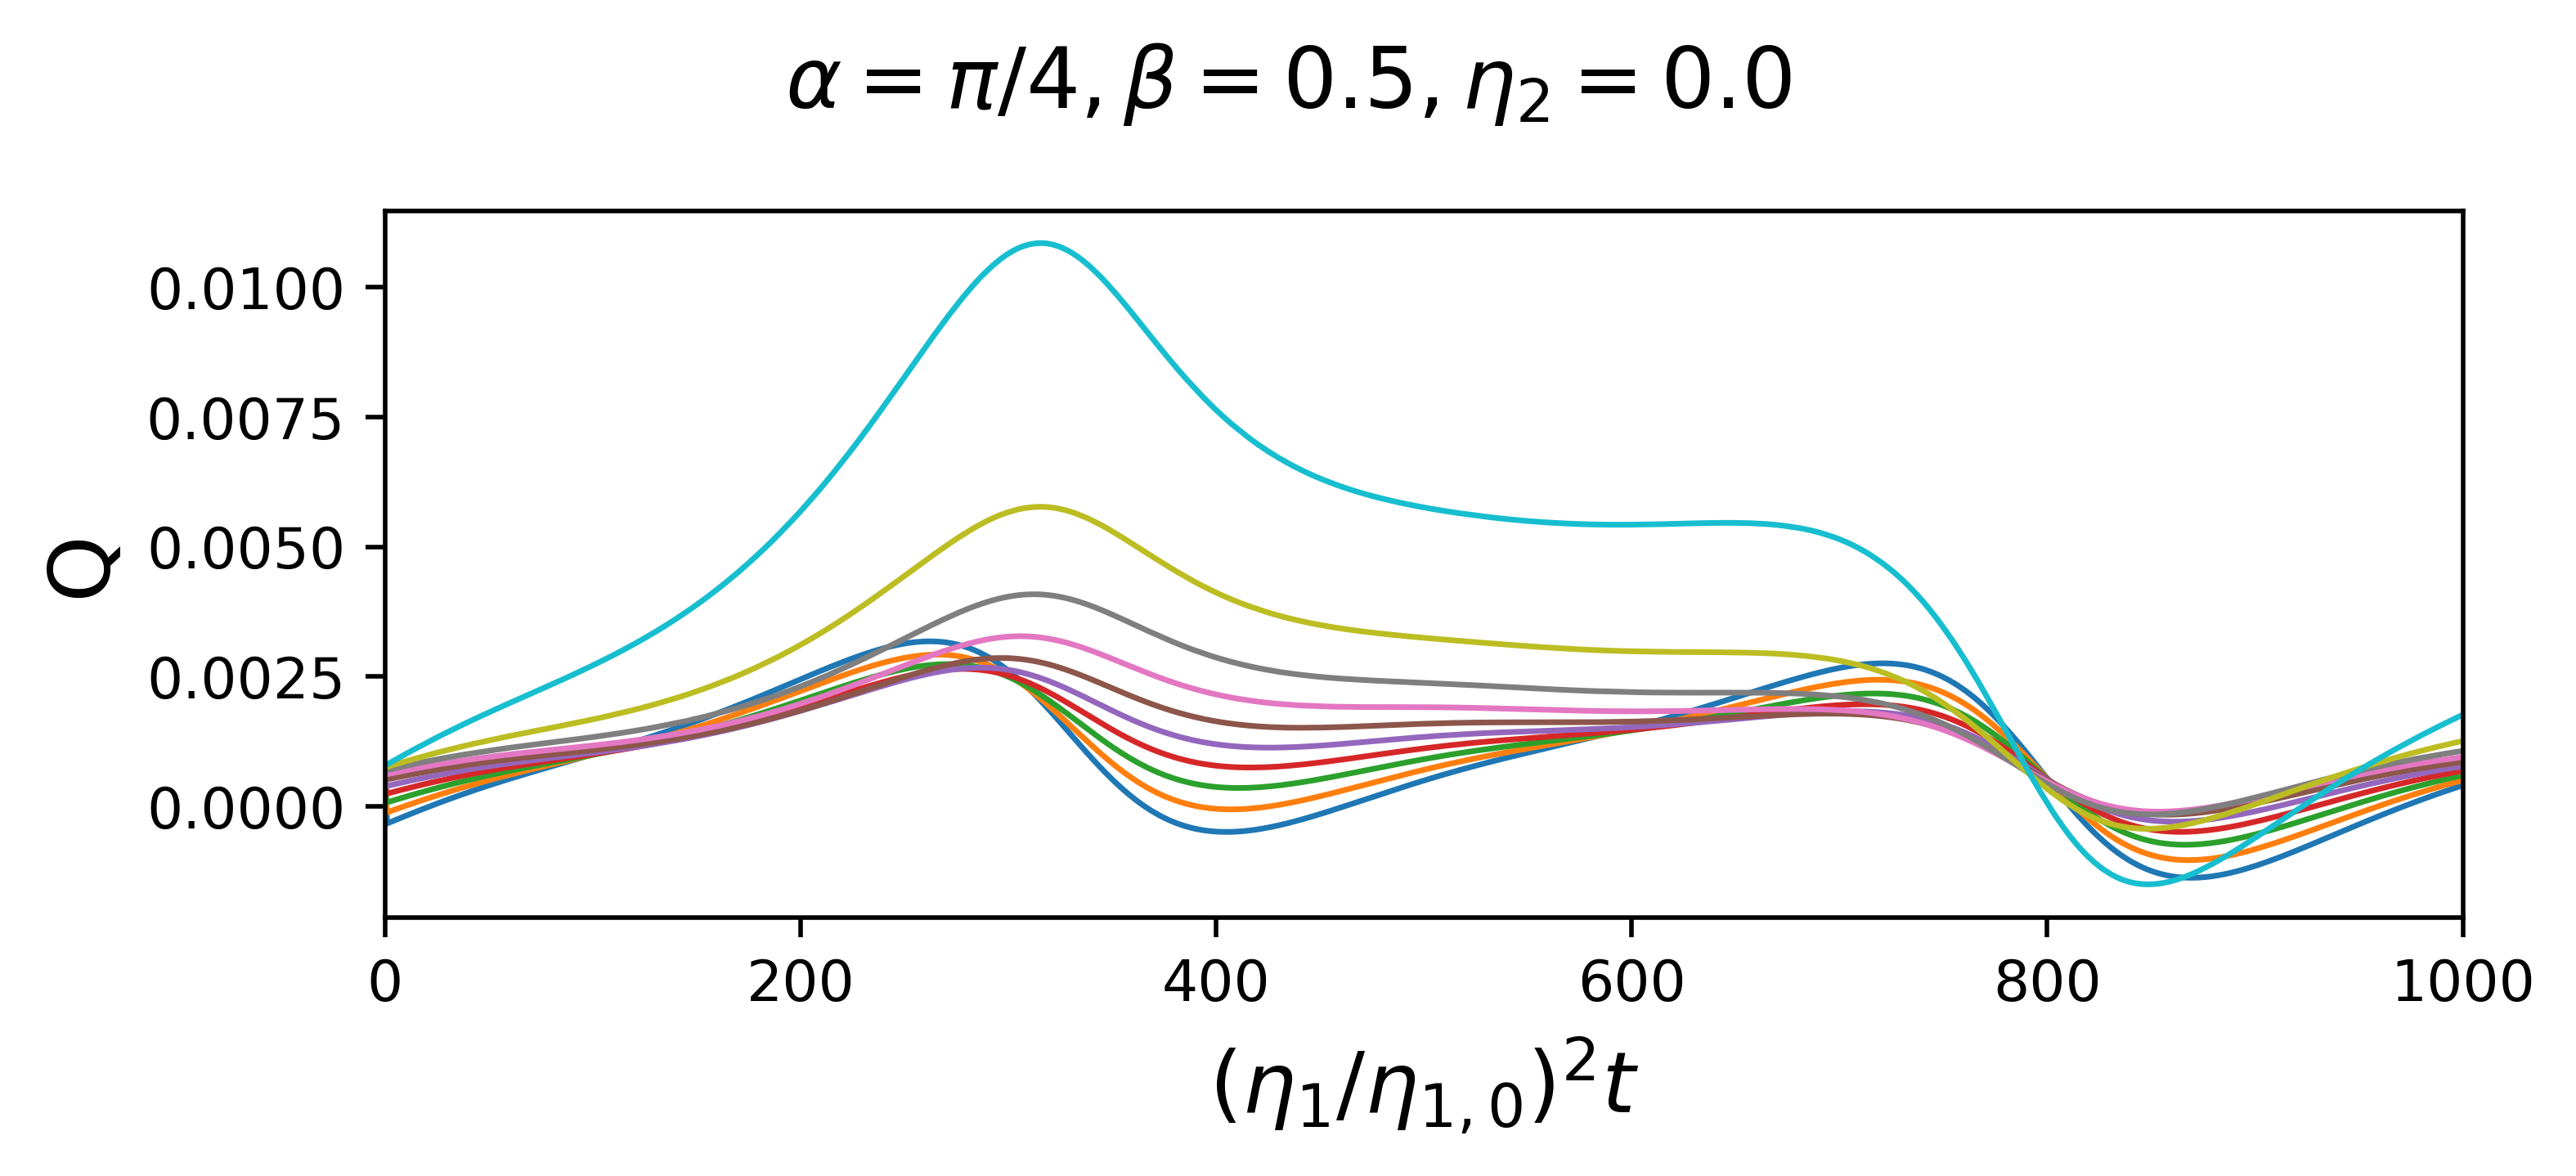

In [36]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)

for eta1 in eta1s:
    plt.plot((eta1/eta1_0)**2*t,Q_2SI[eta1]-Q_2OA[eta1],label='Simulation',lw=1,zorder=0)
    print(eta1,np.max(Q_2SI[eta1]-Q_2OA[eta1]),np.min(abs(Q_2SI[eta1]-Q_2OA[eta1])))
    # plt.plot(t,Q2,label=r'OA ansatz $n=1$')
    # plt.plot((eta1/eta1_0)**2*t,Q_2OA[eta1],label='OA ansatz $n>1$',color='blue')        

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel(r'$\left(\eta_{1}/\eta_{1,0}\right)^2 t$',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_2 = {eta2}$',fontsize=15)
plt.xlim(0,1000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def f_c(xs,c):
    a = c*np.exp(2j*xs)
    b = c*np.exp(-2j*xs)
    return 1/(2*np.pi) * (1 + a/(1-a) + b/(1-b))


def f_c_a(xs,c):
    return 1/(2*np.pi) * (1-c**2) / (1-2*c*np.cos(2*xs) + c**2)

In [96]:
def f_c(xs,c,epsilon):
    a = c*np.exp(2j*xs)
    b = c*np.exp(-2j*xs)
    eps_a = epsilon*np.exp(2j*xs)
    eps_b = epsilon*np.exp(-2j*xs)
    return 1/(2*np.pi) * (1 + a/(1-a) + b/(1-b) - eps_a - eps_b)


def f_c_d(xs,c,epsilon):
    return 1/(2*np.pi) * (1-c**2) / (1-2*c*np.cos(2*xs) + c**2) - epsilon/(np.pi) * np.cos(2*xs)

def f_c_r(xs,c,epsilon):
    return 1/(2*np.pi) * (1-c**2) / (1-2*c*np.cos(2*xs) + c**2) + epsilon/(np.pi) * np.cos(xs)

In [130]:
def gen_dist_pert_r(N,Q,eps):
    xs = np.linspace(-np.pi/2, 3*np.pi/2, 10000)
    f_r = 1/(2*np.pi) * (1-Q**2) / (1-2*Q*np.cos(2*xs) + Q**2) + eps/(np.pi) * np.cos(xs)
    f_r /=np.sum(f_r)
    u = np.linspace(0,1,N+2,endpoint=True)[1:-1]
    L = np.cumsum(f_r)
    idx = np.searchsorted(L,u)
    return xs[idx]

def gen_dist_pert_q(N,Q,eps):
    xs = np.linspace(-np.pi/2, 3*np.pi/2, 10000)
    f_r = 1/(2*np.pi) * (1-Q**2) / (1-2*Q*np.cos(2*xs) + Q**2) - eps/(np.pi) * np.cos(2*xs)
    f_r /=np.sum(f_r)
    u = np.linspace(0,1,N+2,endpoint=True)[1:-1]
    L = np.cumsum(f_r)
    idx = np.searchsorted(L,u)
    return xs[idx]


In [138]:
A = gen_dist_pert_q(5000,0.6,0.1)

In [139]:
np.abs(np.mean(np.exp(2j*A)))

0.5002293640486796

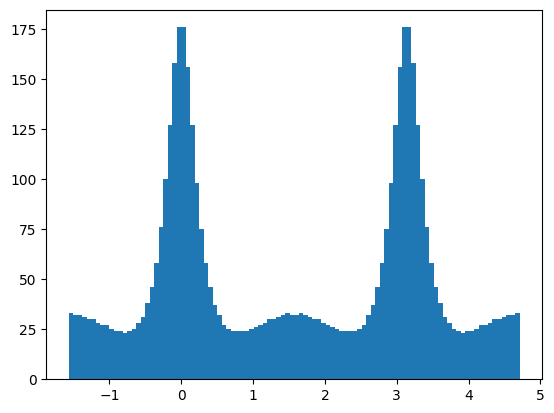

In [134]:
plt.hist(gen_dist_pert_q(5000,0.6,0.2),bins=100);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.141592653589793, 3.141592653589793)

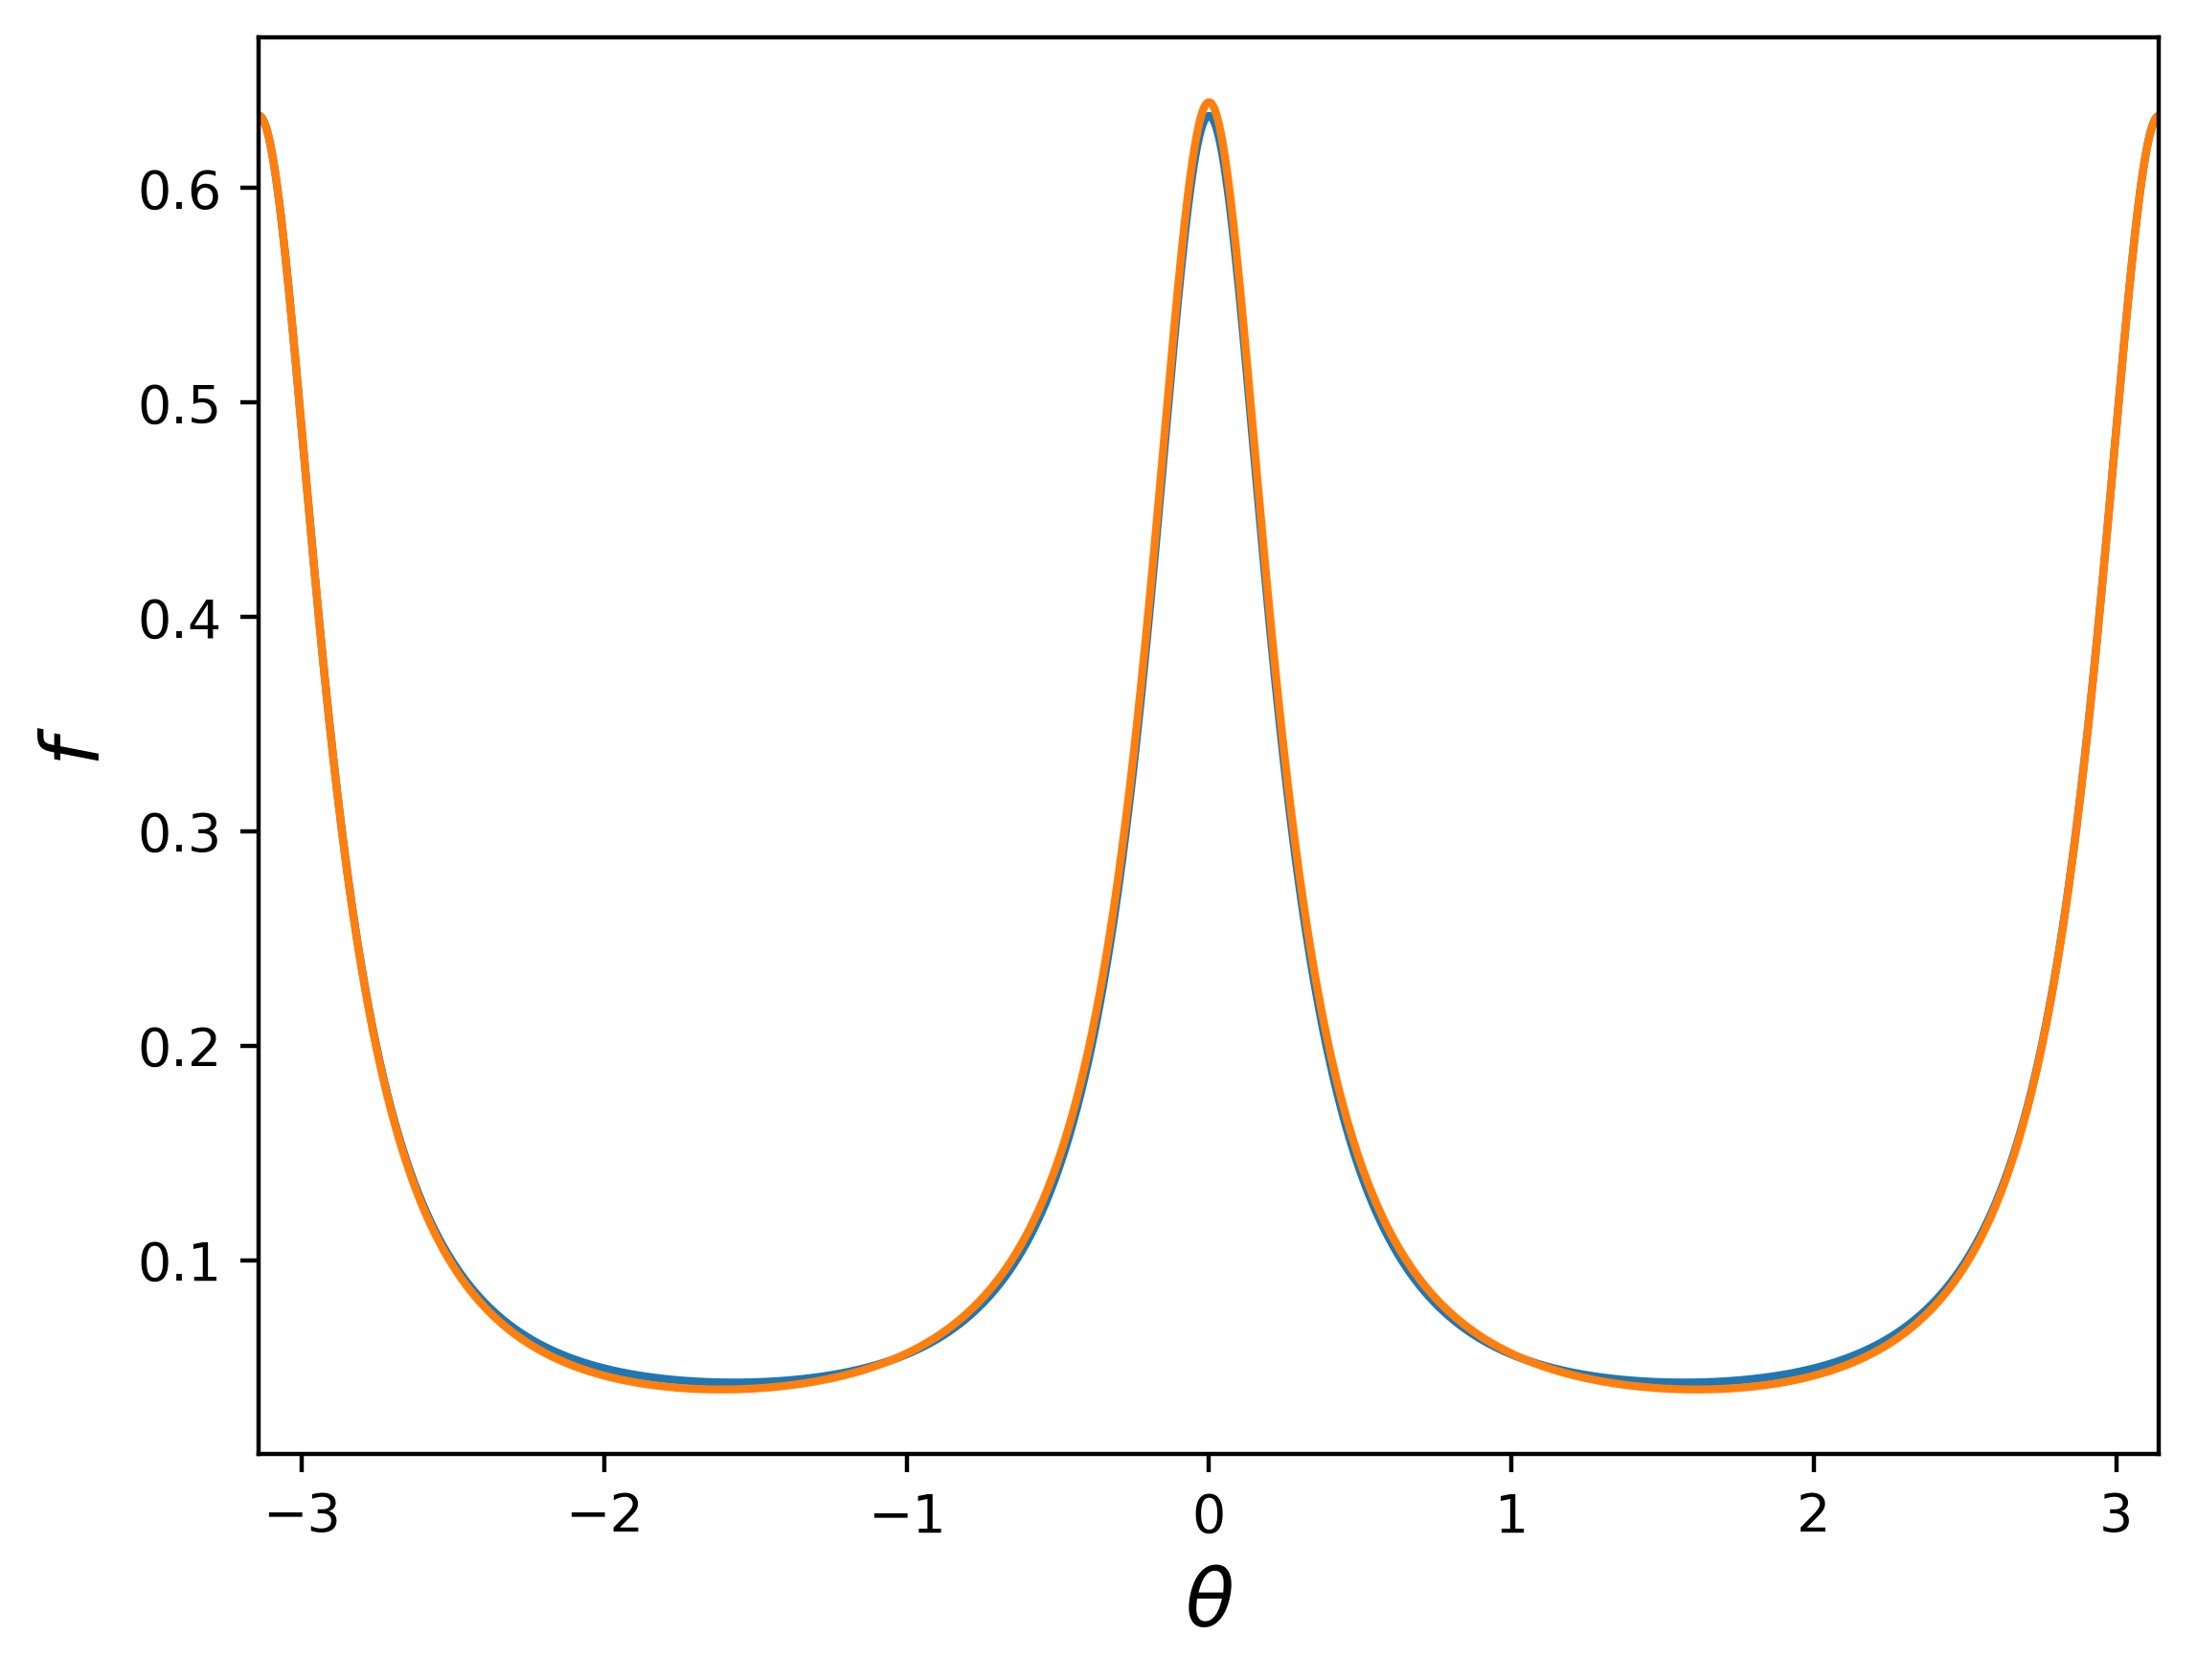

In [97]:
xs = np.linspace(-np.pi, np.pi, 100000)
eps = 0.01
y = f_c(xs,0.6,eps)
y2 = f_c_a(xs,0.6,eps)
plt.figure(dpi=400)
plt.plot(xs,y)
plt.plot(xs,y2)
plt.ylabel(r'$f$',fontsize=15)
plt.xlabel(r'$\theta$',fontsize=15)
plt.xlim(-np.pi,np.pi)
# plt.ylim(0,)

In [98]:
np.abs(np.sum(f_c_a(xs,0.6,0.1) * np.exp(-1j*xs))/ (1/ (xs[1] - xs[0])))

0.09996199961980703

In [99]:
xs = np.linspace(-np.pi, np.pi, 10000)

def Draw_F(eps):
    y = f_c(xs,0.6,eps)
    plt.plot(xs,y,label=f'$\epsilon={eps:.03f}$')
    
def Draw_err(eps):
    y = f_c_r(xs,0.6,eps)
    plt.plot(xs,y,label=f'$\epsilon={eps:.03f}$')

(0.0, 0.7685813468811293)

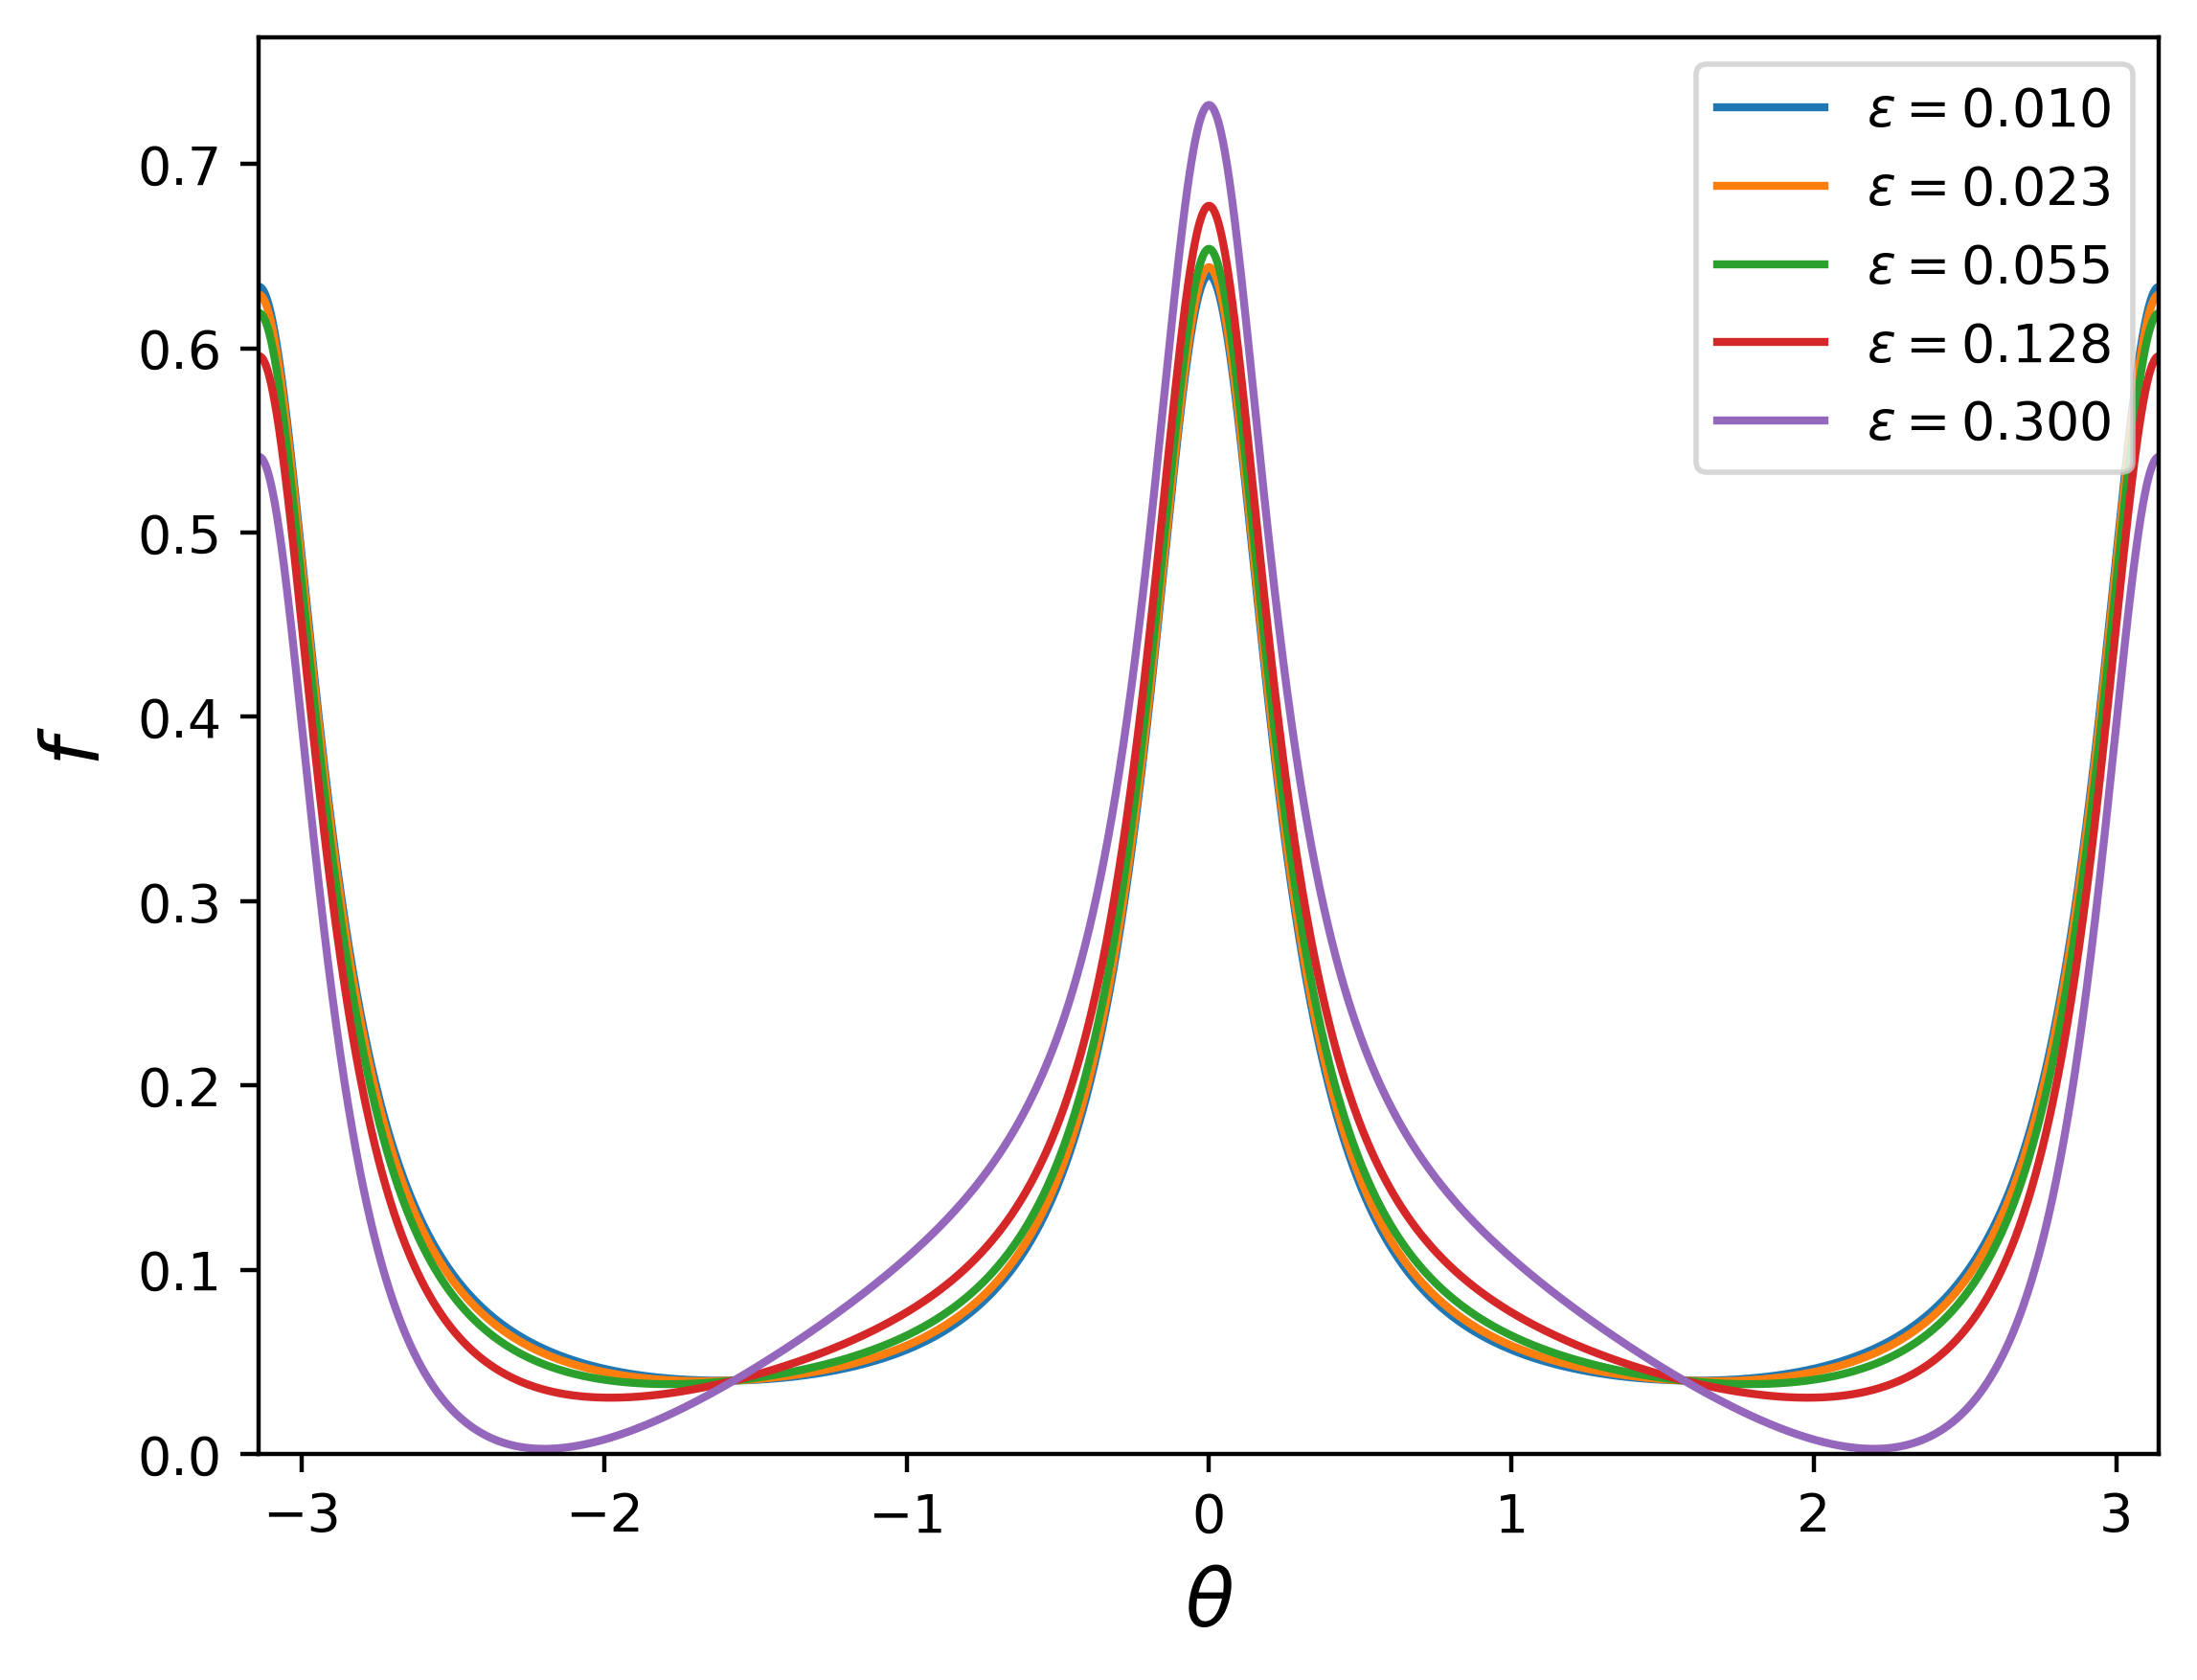

In [102]:
eps = 0.1

ee = np.logspace(-2,np.log10(0.3),5)
plt.figure(dpi=400)
[*map(Draw_err,ee)]
plt.ylabel(r'$f$',fontsize=15)
plt.xlabel(r'$\theta$',fontsize=15)
plt.legend()
plt.xlim(-np.pi,np.pi)
plt.legend()
plt.ylim(0,)

In [28]:
1/ (xs[1] - xs[0])

15915.335154276569

In [29]:
np.abs(np.sum(y))/ (1/ (xs[1] - xs[0]))

1.0000380003781109